# Pre-processing - MIQR-CC Dataset
This notebook demonstrates preprocessing steps applied to the MIQR-CC dataset. It is organized into smaller cells (helper functions first, then an example run) to improve readability. Note: dataset metadata and images are hosted separately - see `README.md` for instructions.

In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

## Detect vertical lines

Helper function that finds vertical lines using Canny + Hough and returns Canny edges and the list of vertical lines.

In [ ]:
def detect_vertical_lines(image, canny1=30, canny2=150, hough_threshold=120, min_line_length=70, max_line_gap=4, angle_threshold_deg=10):
    edges = cv2.Canny(image, canny1, canny2)
    lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=hough_threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)

    vertical_lines = []
    if lines is not None:
        for l in lines:
            x1, y1, x2, y2 = l[0]
            angle = abs(math.degrees(math.atan2(y2 - y1, x2 - x1)))
            if abs(angle - 90) <= angle_threshold_deg:
                vertical_lines.append(l)

    return edges, vertical_lines

## Segment image by vertical lines

Cuts the image into column segments using detected vertical lines.


In [ ]:
def segment_image_by_vertical_lines(image, lines, min_width=30):
    if not lines:
        return [image]

    lines = sorted(lines, key=lambda x: x[0][0])
    x_positions = [0] + [l[0][0] for l in lines] + [image.shape[1]]

    segments = []
    for i in range(len(x_positions) - 1):
        x_start, x_end = x_positions[i], x_positions[i + 1]
        if x_end - x_start >= min_width:
            segments.append(image[:, x_start:x_end])

    return segments if segments else [image]

## Segment validation

Simple heuristics to mark a segment as valid or invalid (width, darkness, contrast).

In [ ]:
def is_image_valid(image, min_width=212, black_percentile=90, contrast_threshold=10):
    h, w = image.shape

    if w < min_width:
        return False

    if np.percentile(image, black_percentile) < 1:
        return False

    px_max, px_min = image.max(), image.min()
    if px_max - px_min < contrast_threshold:
        return False

    return True

## Plot results (visualization)

Plot original image, Canny edges, Hough overlay and cropped segments with validity indicators.

In [ ]:
def plot_results(img, edges, lines, segments):
    cols = min(len(segments), 10)
    rows = math.ceil(len(segments) / cols)

    fig, axes = plt.subplots(rows + 1, cols, figsize=(3 * cols, 3 * (rows + 1)))

    # Hough overlay
    img_hough = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    for l in lines:
        x1, y1, x2, y2 = l[0]
        cv2.line(img_hough, (x1, y1), (x2, y2), (0, 0, 255), 2)

    axes[0, 0].imshow(img, cmap="gray")
    axes[0, 0].set_title("Original")
    axes[0, 1].imshow(edges, cmap="gray")
    axes[0, 1].set_title("Canny")
    axes[0, 2].imshow(img_hough[..., ::-1])
    axes[0, 2].set_title("Hough")

    for ax in axes[0, 3:]:
        ax.axis("off")

    for i, seg in enumerate(segments):
        r = 1 + i // cols
        c = i % cols
        ax = axes[r, c]
        ax.imshow(seg, cmap="gray")

        valid = is_image_valid(seg)
        color = "green" if valid else "red"
        ax.set_title("✓ Valid" if valid else "✗ Invalid", color=color)
        ax.axis("off")

        for spine in ax.spines.values():
            spine.set_edgecolor(color)
            spine.set_linewidth(2)

    plt.tight_layout()
    plt.show()

## Run example: plot representative 'V' images

The example below selects `image_type == 'V'` examples and plots original and segmented crops. The metadata CSV is external; you can set `METADATA_PATH` environment variable or place `metadata.csv` in the notebook root.

In [ ]:
import os

# Plot 50 representative examples
metadata_path = os.environ.get("METADATA_PATH", "metadata.csv")
print(f"Using metadata file: {metadata_path}")

df = pd.read_csv(metadata_path)
df_v = df[df["image_type"] == "V"].head(50)

for _, row in df_v.iterrows():
    print(f'Processing image {row["raw_image_path"]}')
    img = cv2.imread(row["raw_image_path"], cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"❌ Error opening: {row['raw_image_path']}")
        continue

    edges, lines = detect_vertical_lines(img)
    segments = segment_image_by_vertical_lines(img, lines)
    
    plot_results(img, edges, lines, segments)
    print("-" * 119)

Processing image raw/65_image576.png


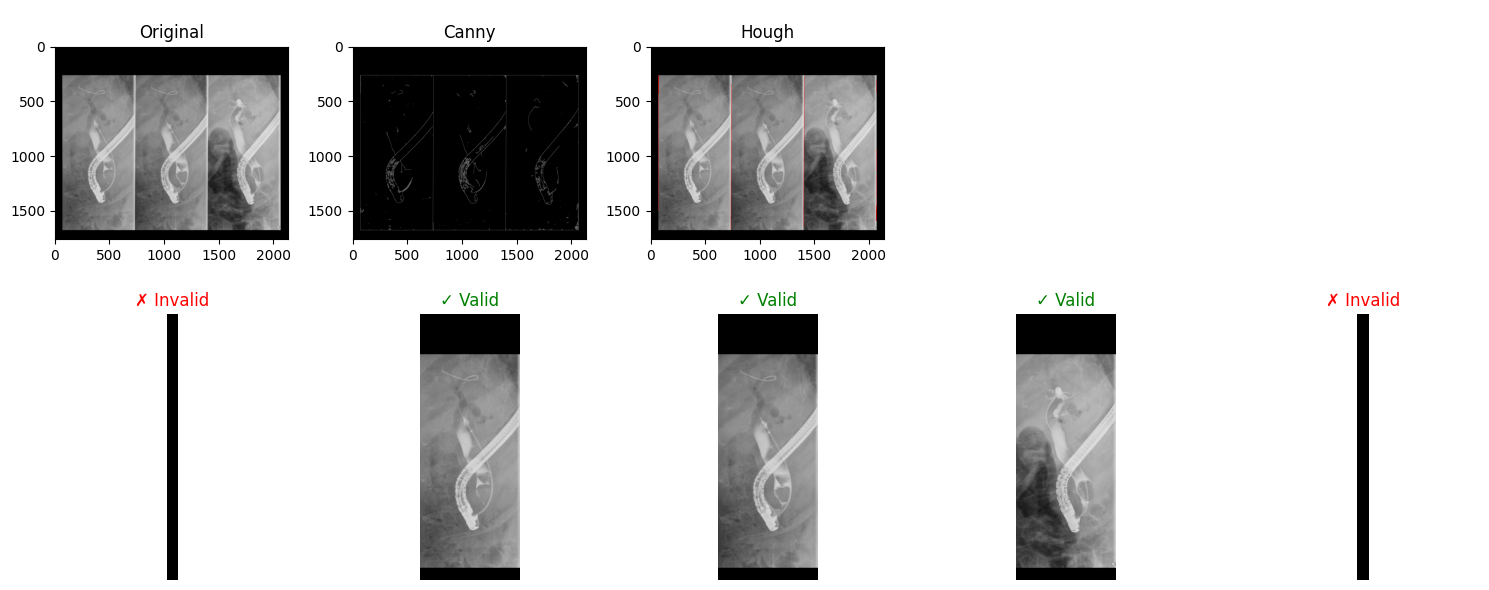

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/65_image576.png


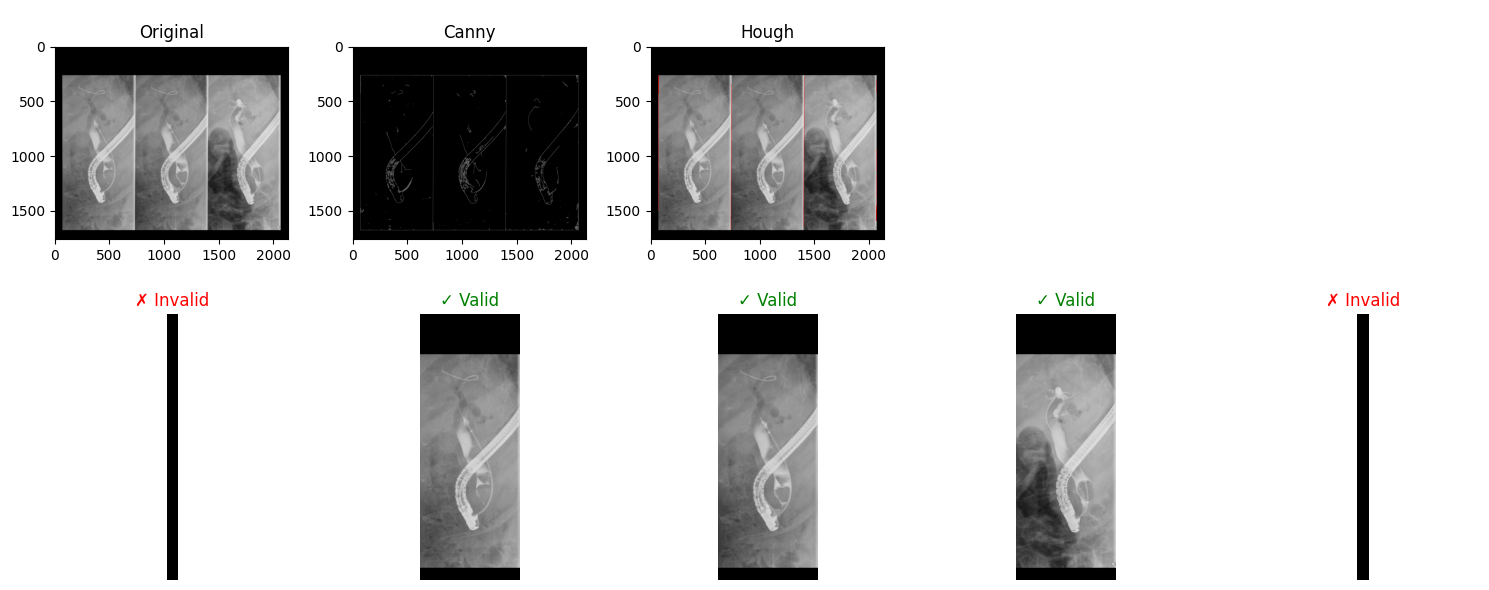

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/65_image576.png


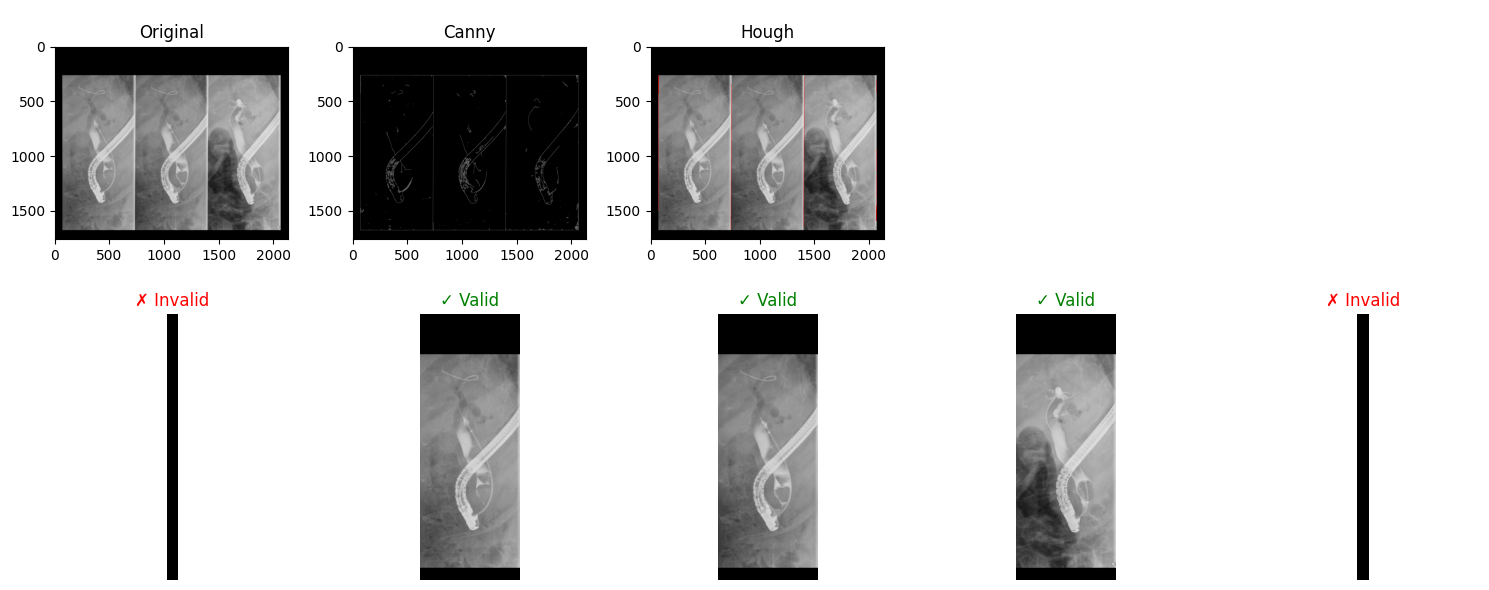

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/244_image2676.png


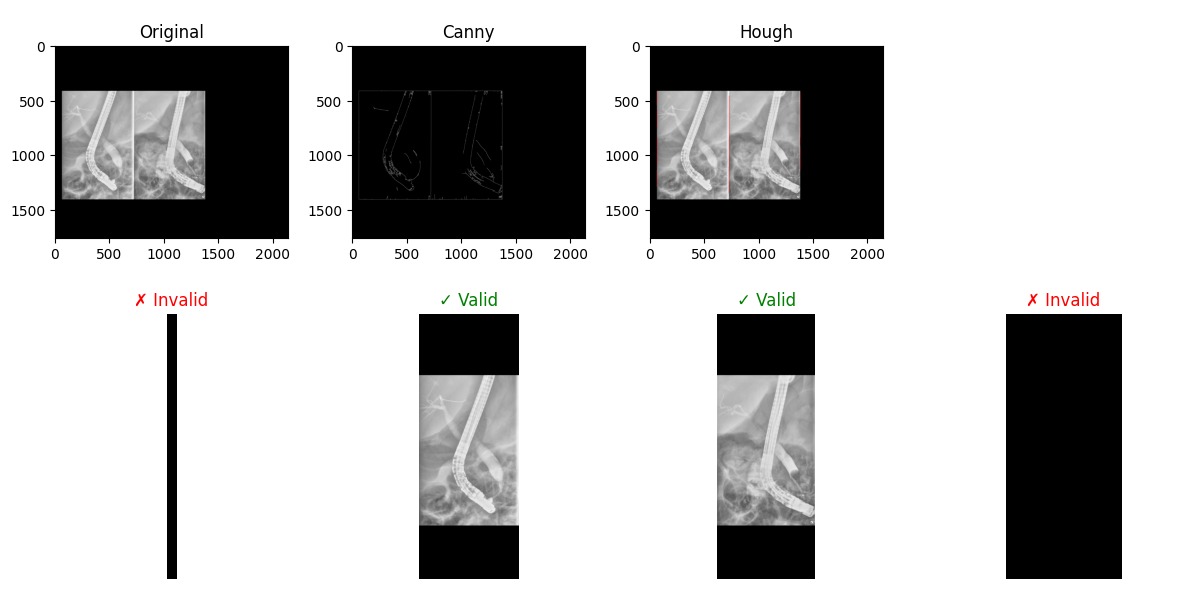

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/244_image2676.png


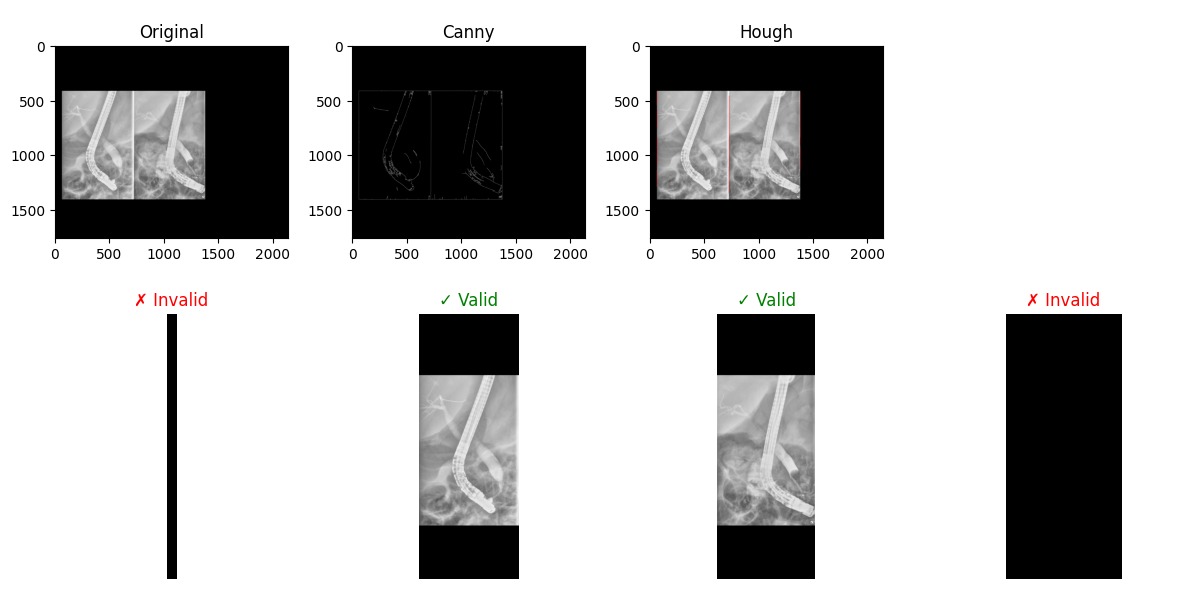

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/633_image7405.png


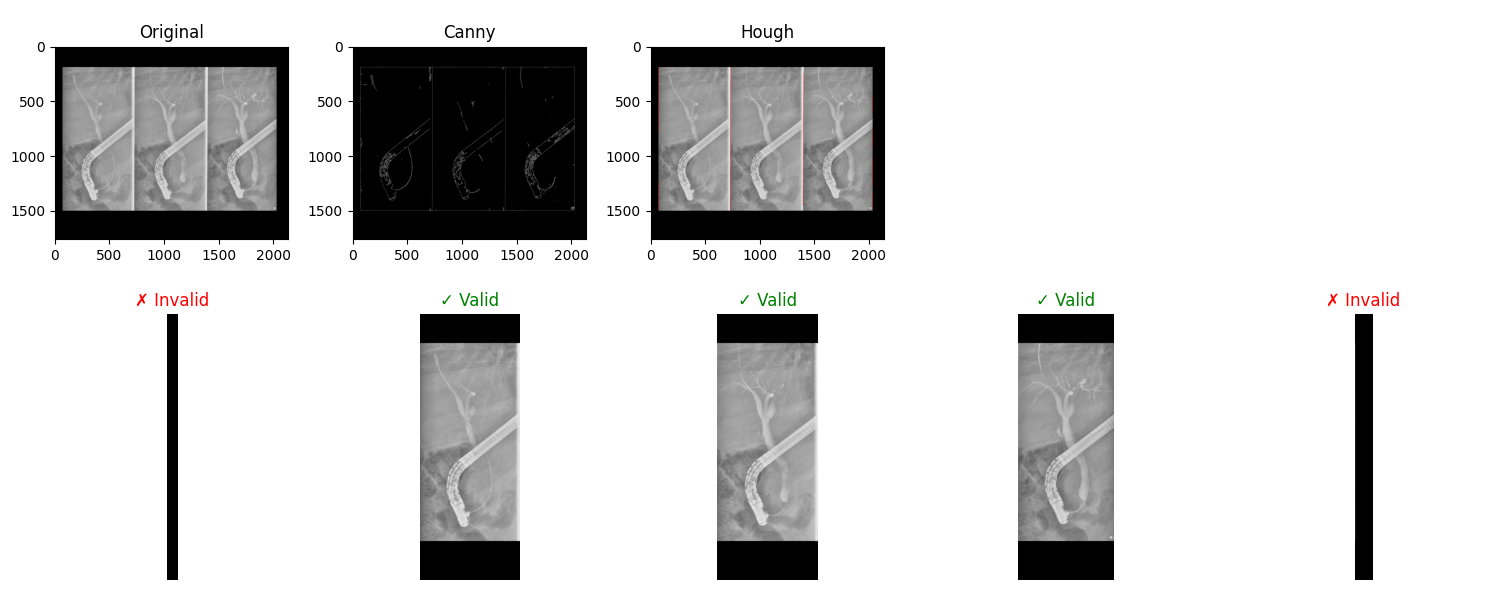

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/633_image7405.png


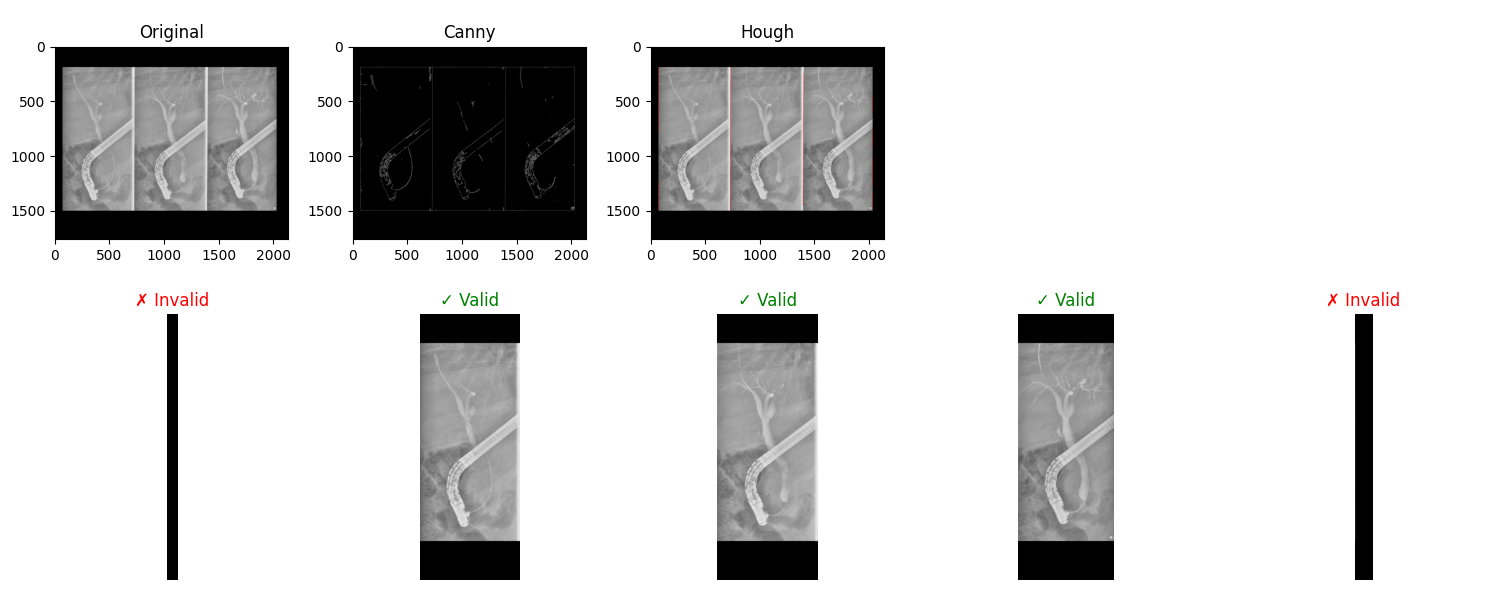

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/633_image7405.png


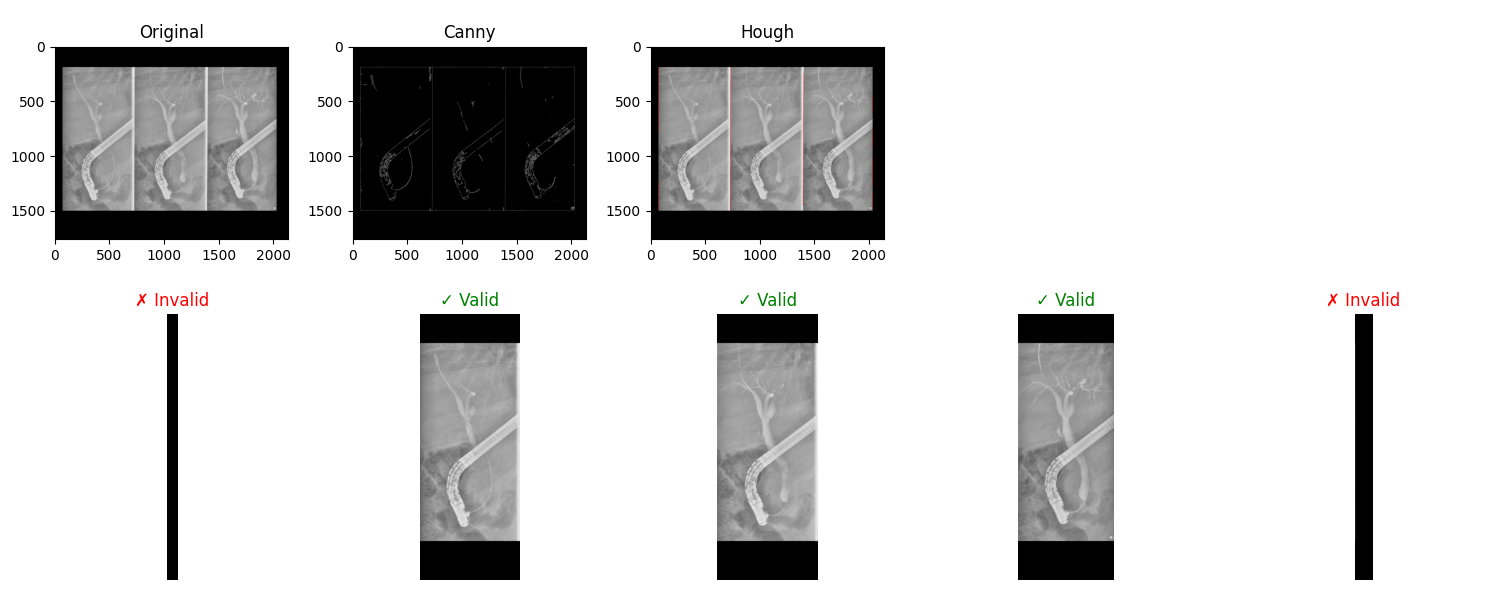

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/633_image7406.png


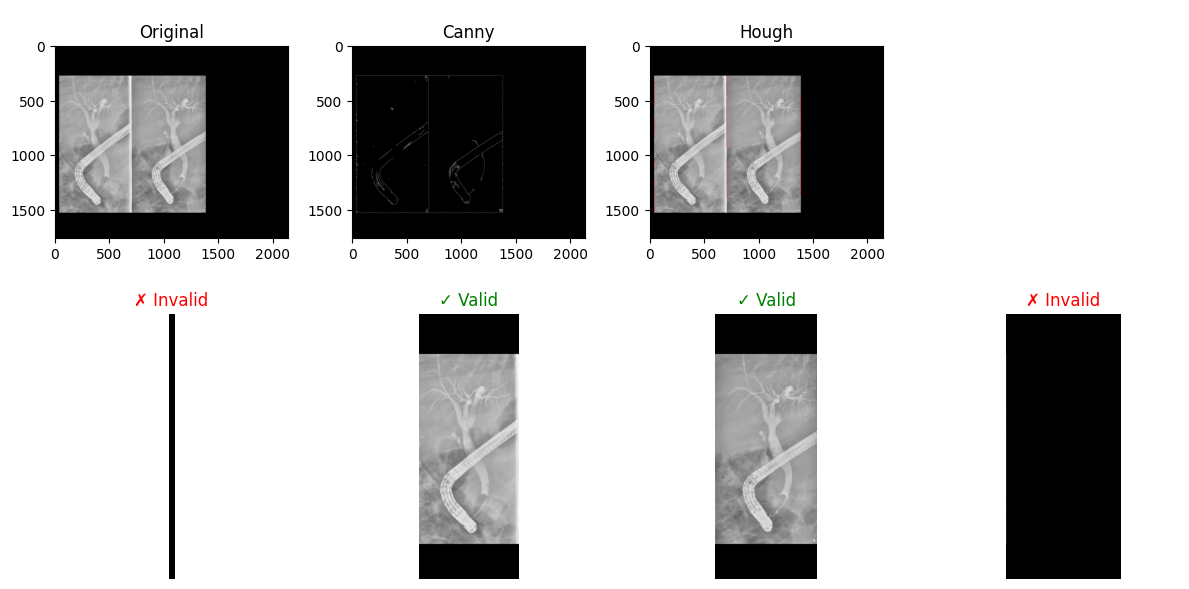

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/633_image7406.png


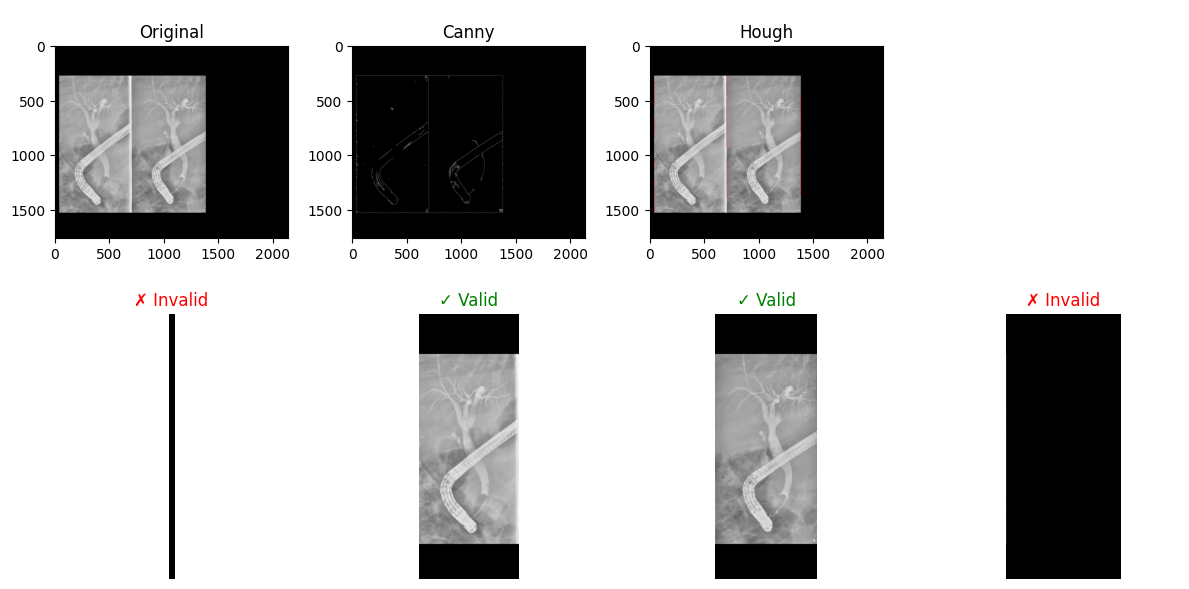

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/914_image11162.png


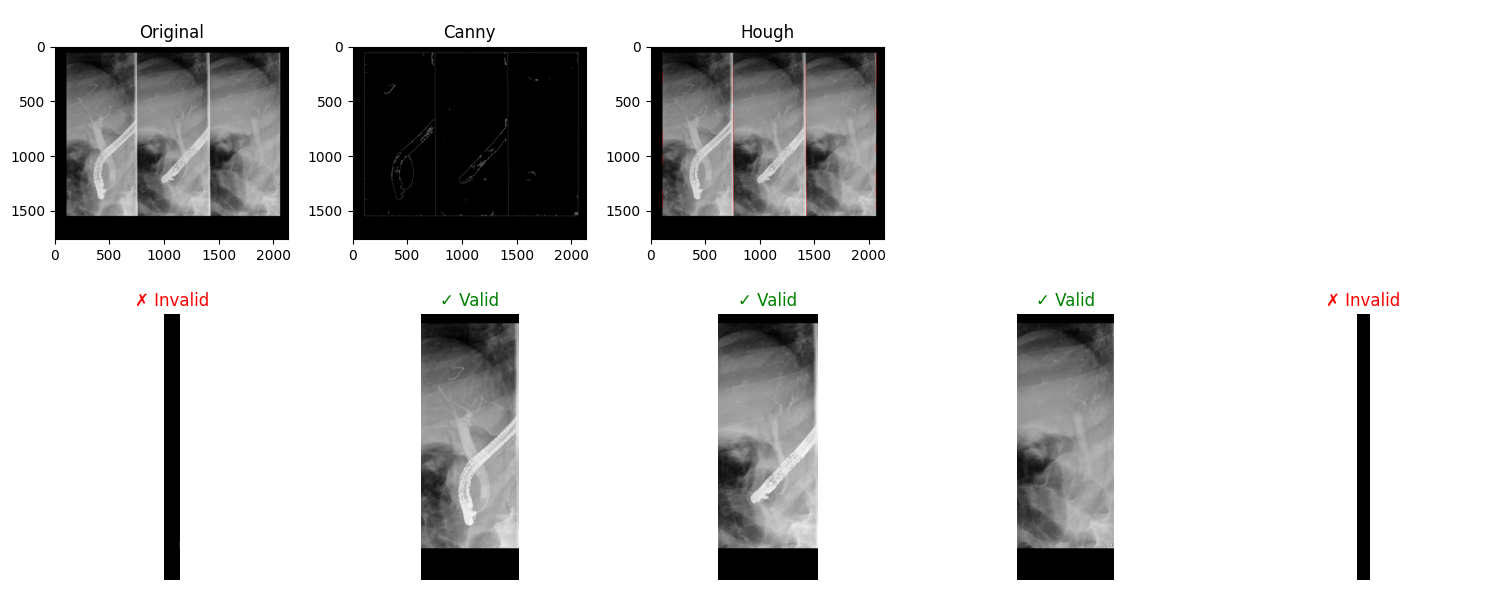

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/914_image11162.png


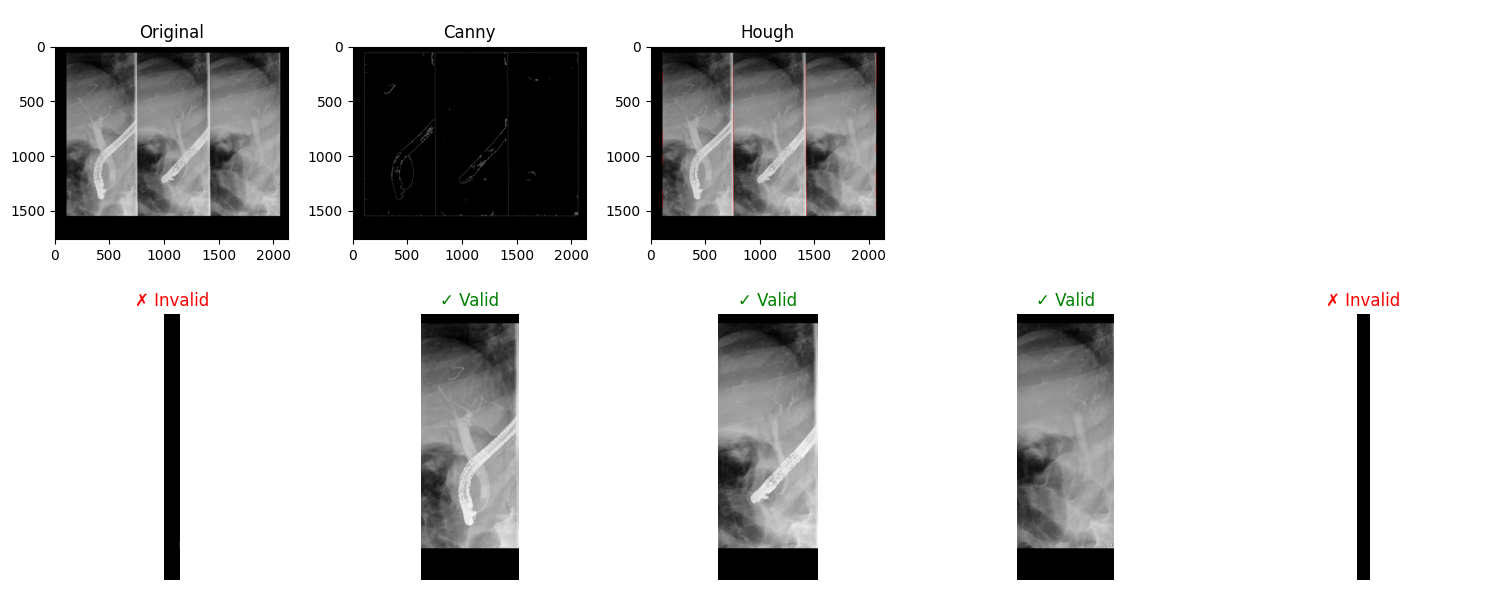

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/914_image11162.png


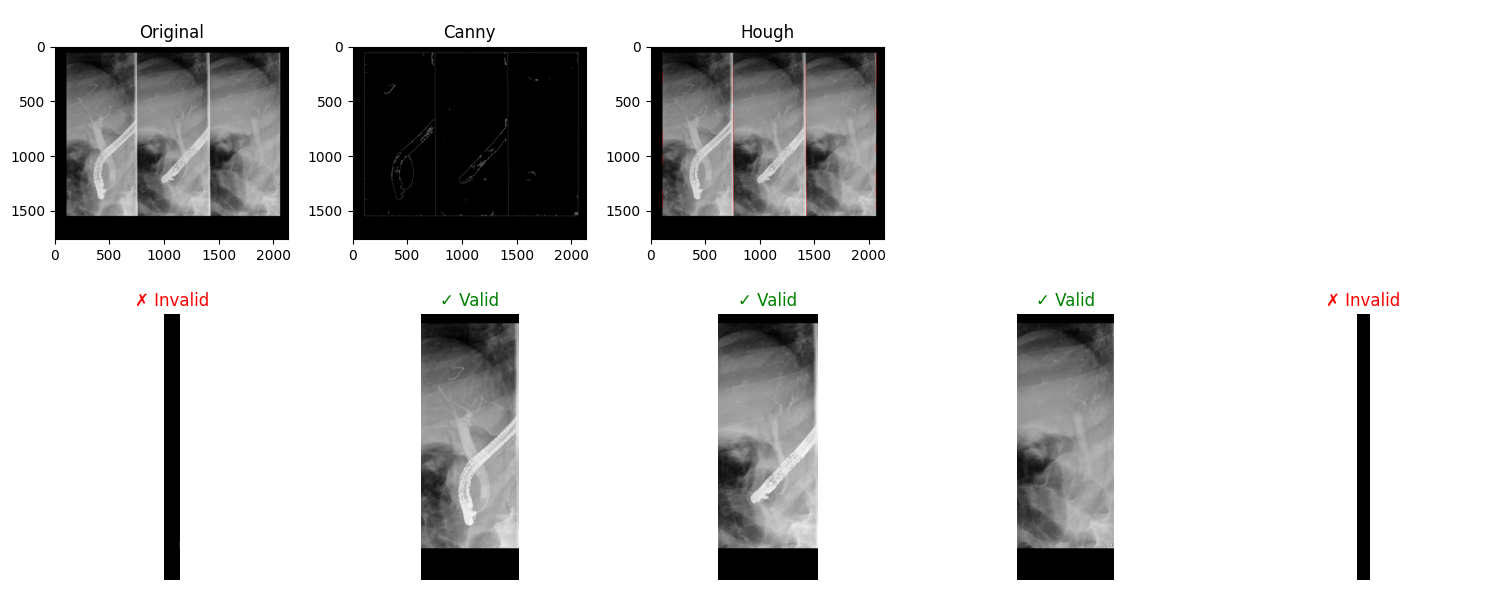

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/976_image12042.png


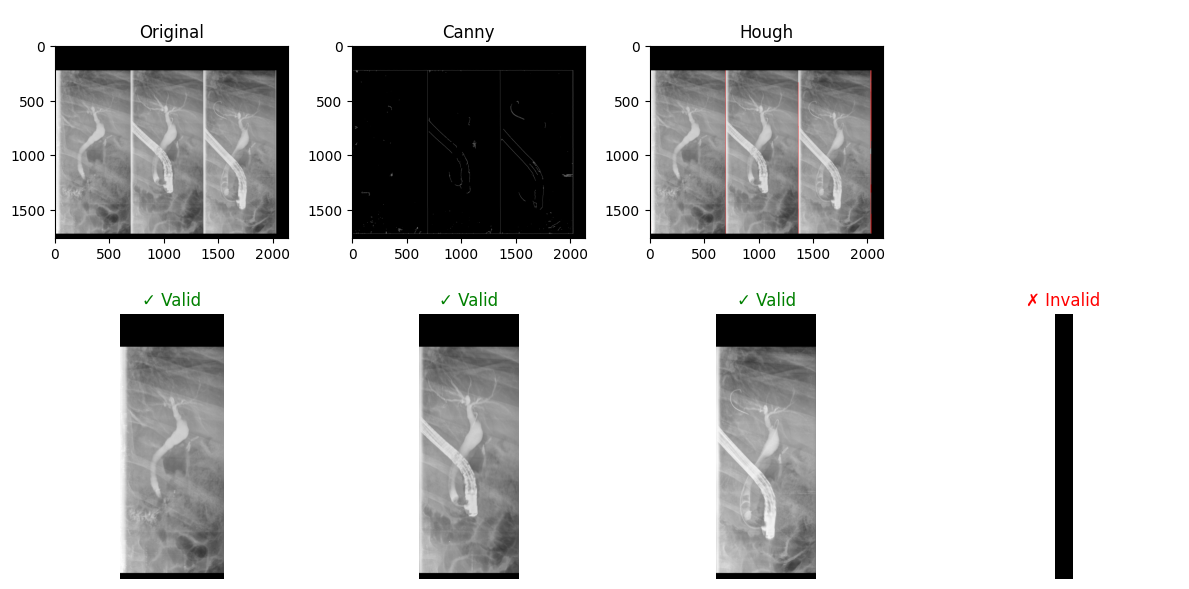

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/976_image12042.png


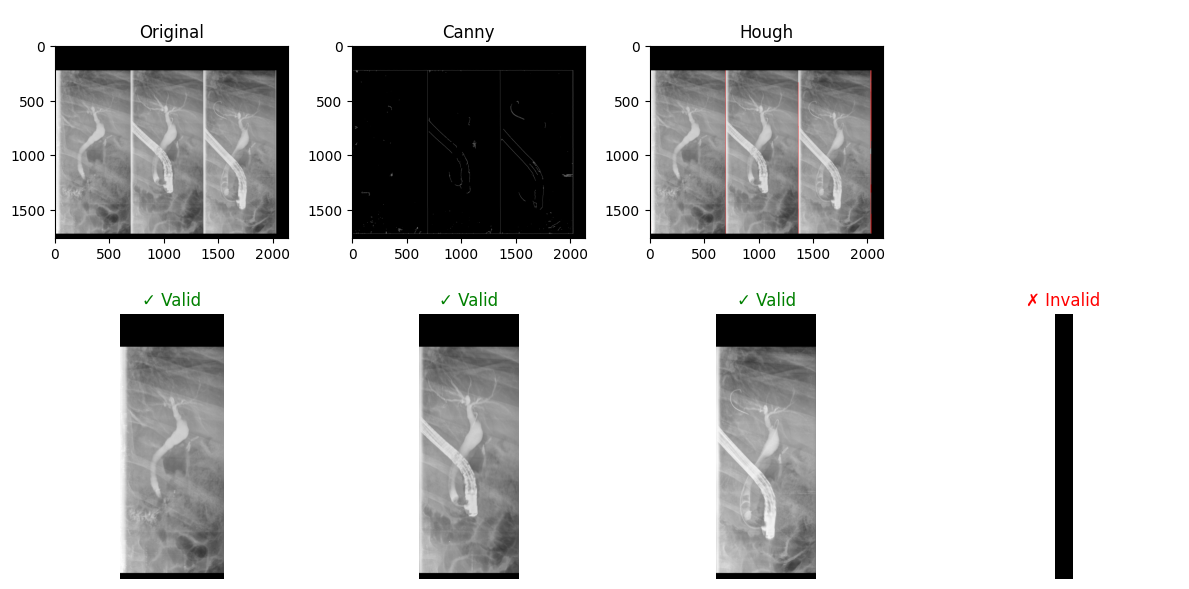

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/976_image12042.png


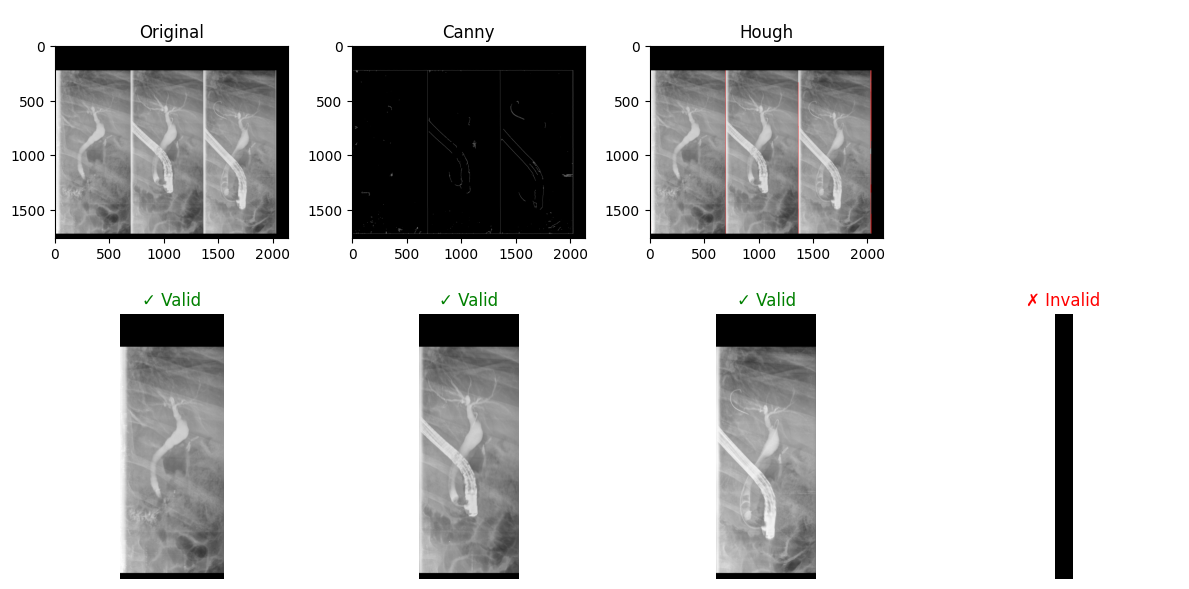

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1165_image14694.png


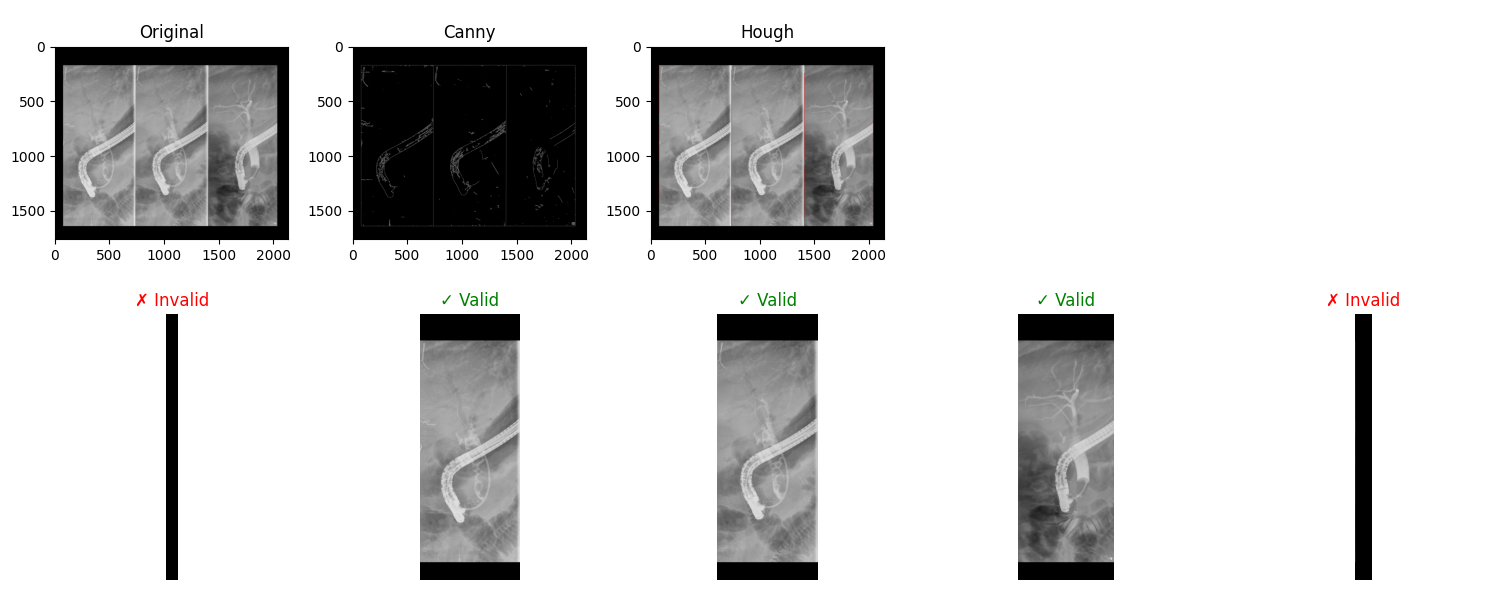

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1165_image14694.png


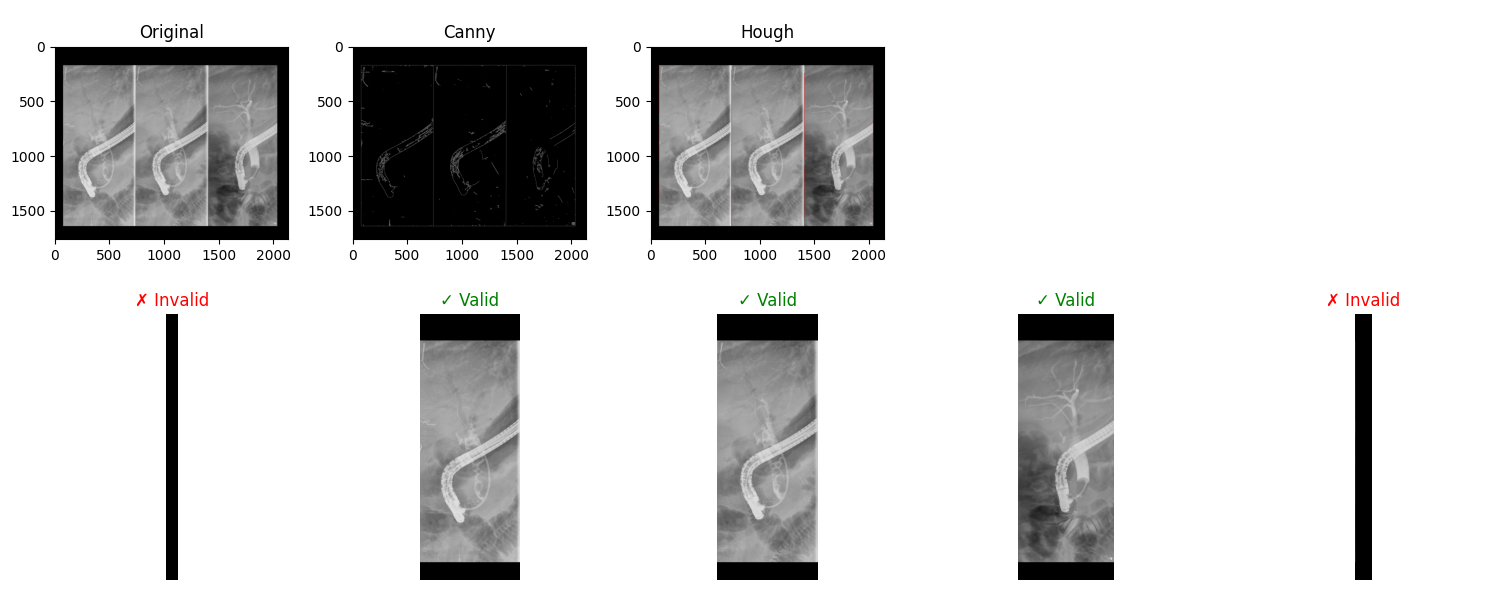

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1165_image14694.png


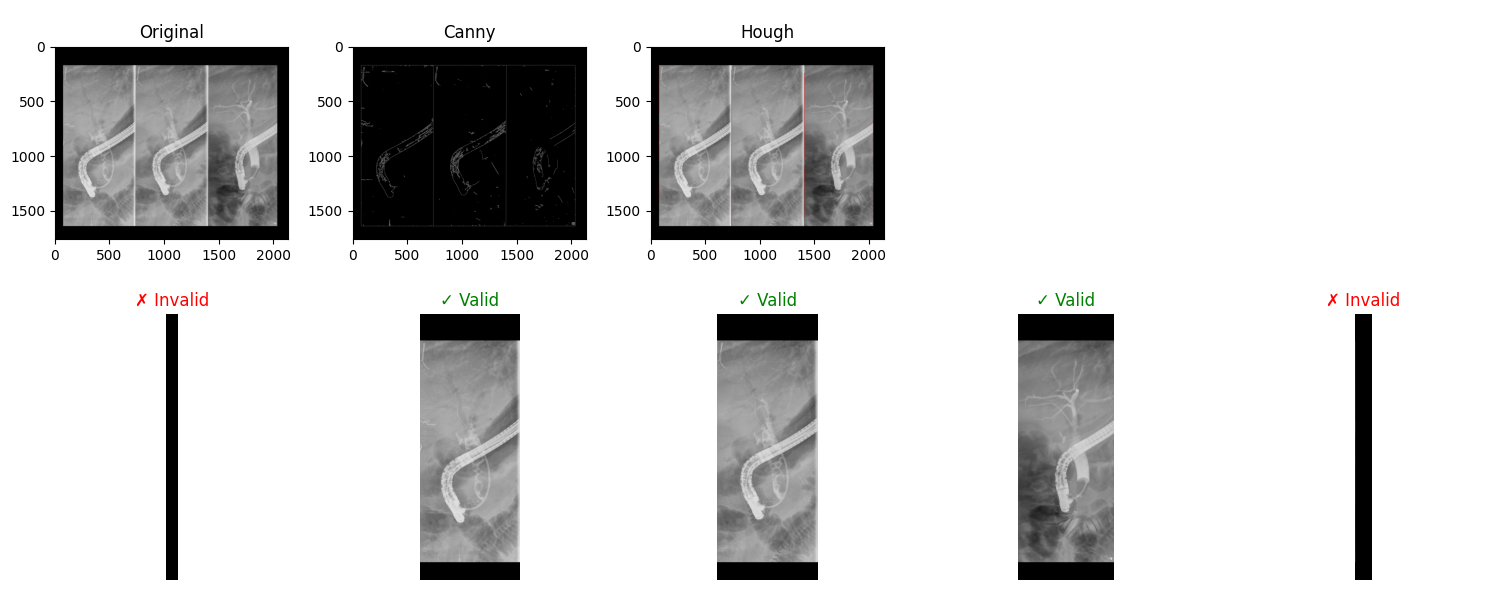

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1165_image14695.png


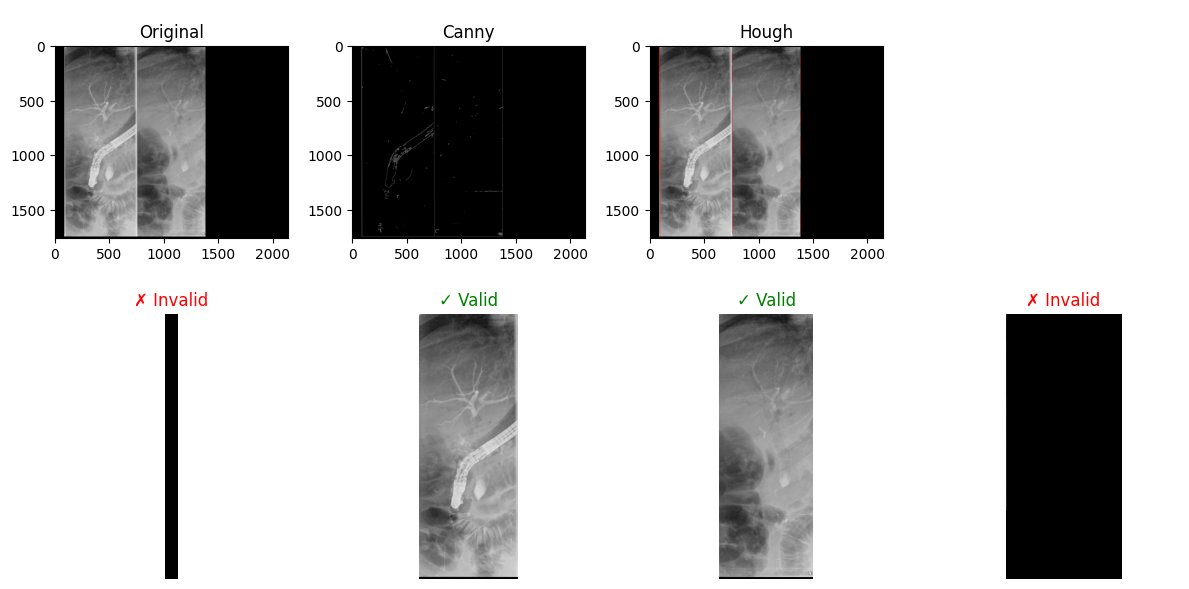

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1165_image14695.png


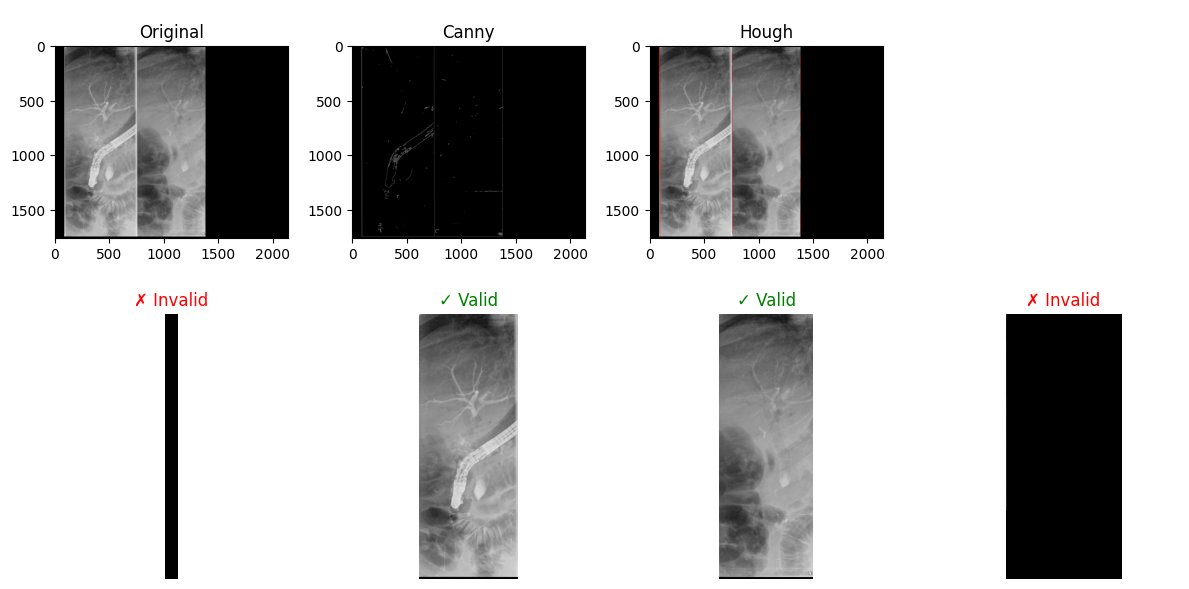

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1486_image19205.png


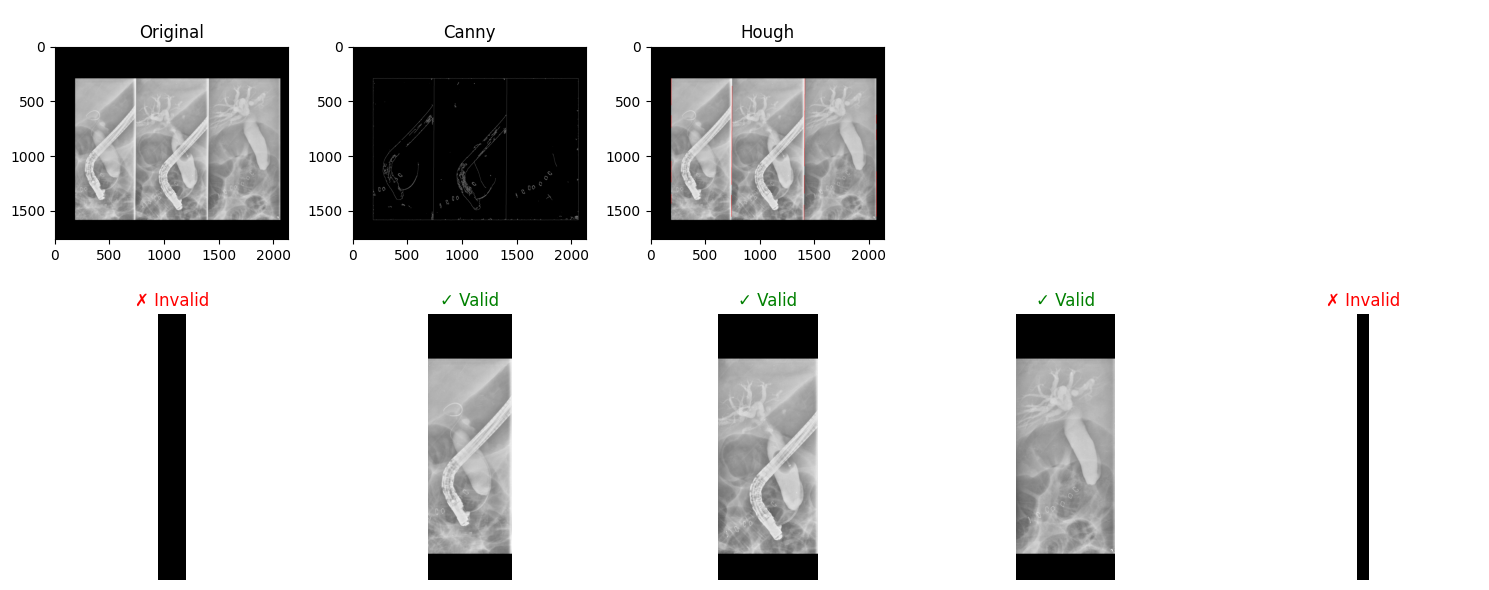

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1486_image19205.png


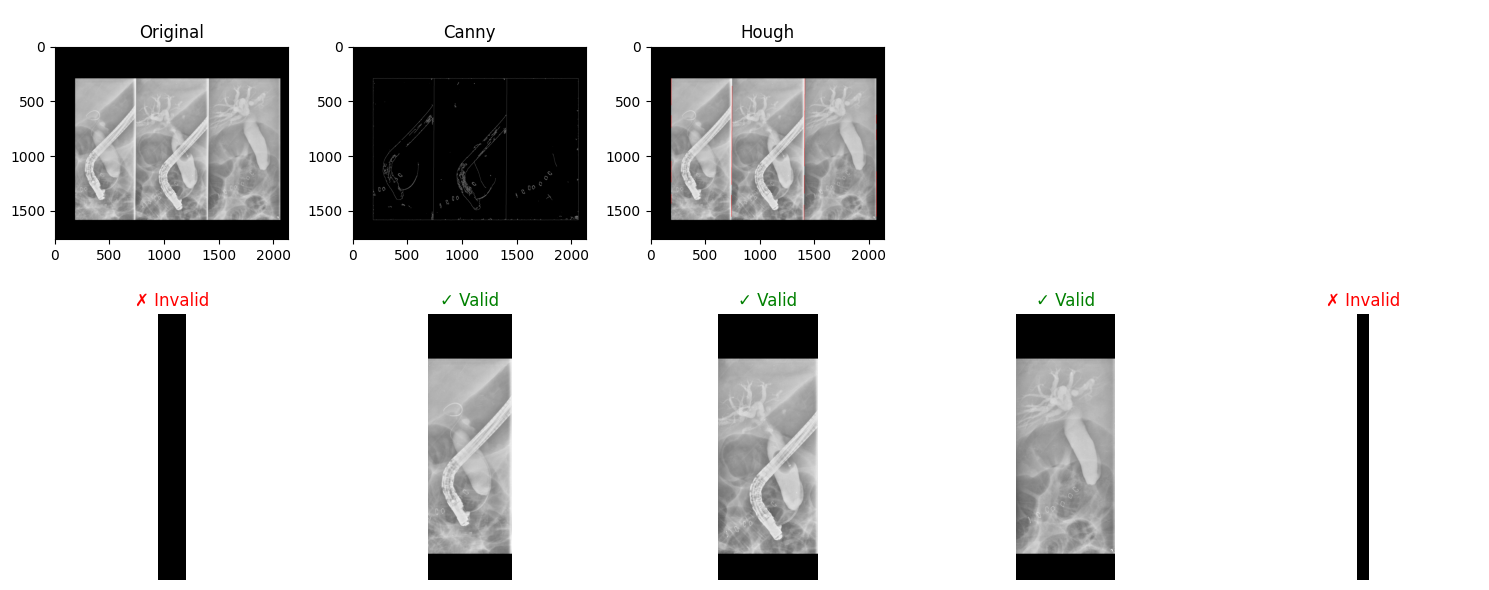

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1486_image19205.png


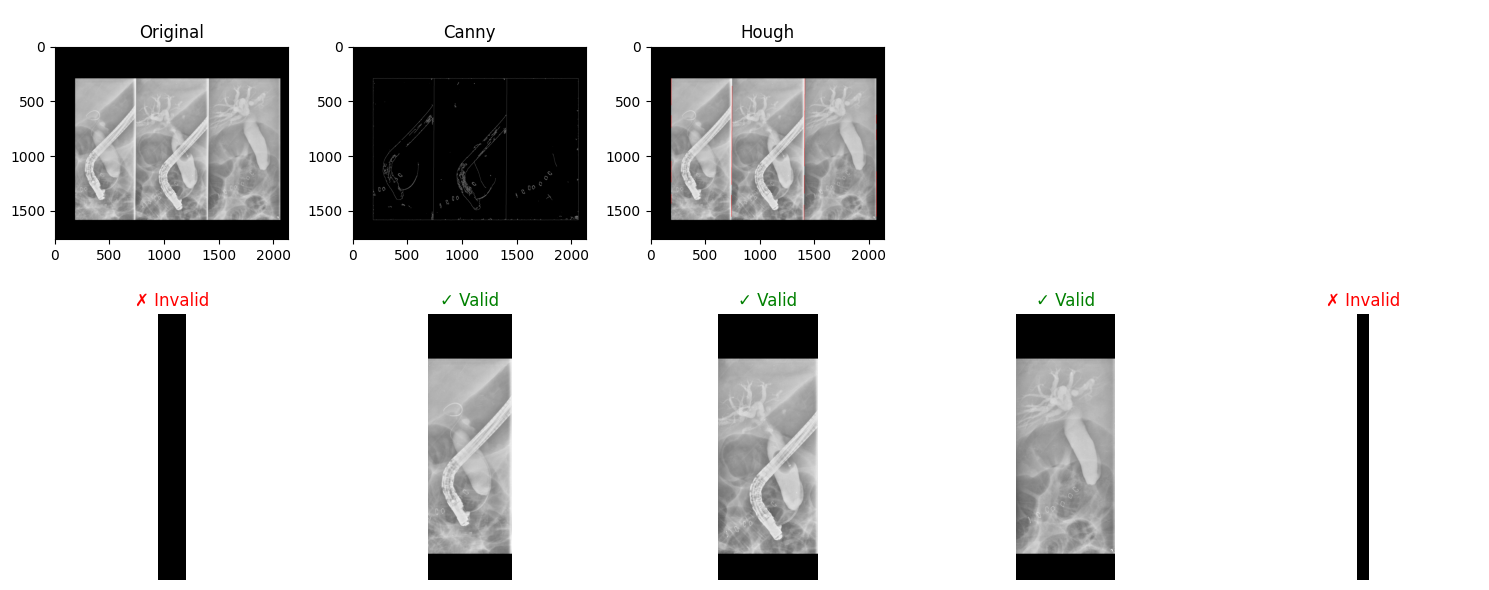

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19206.png


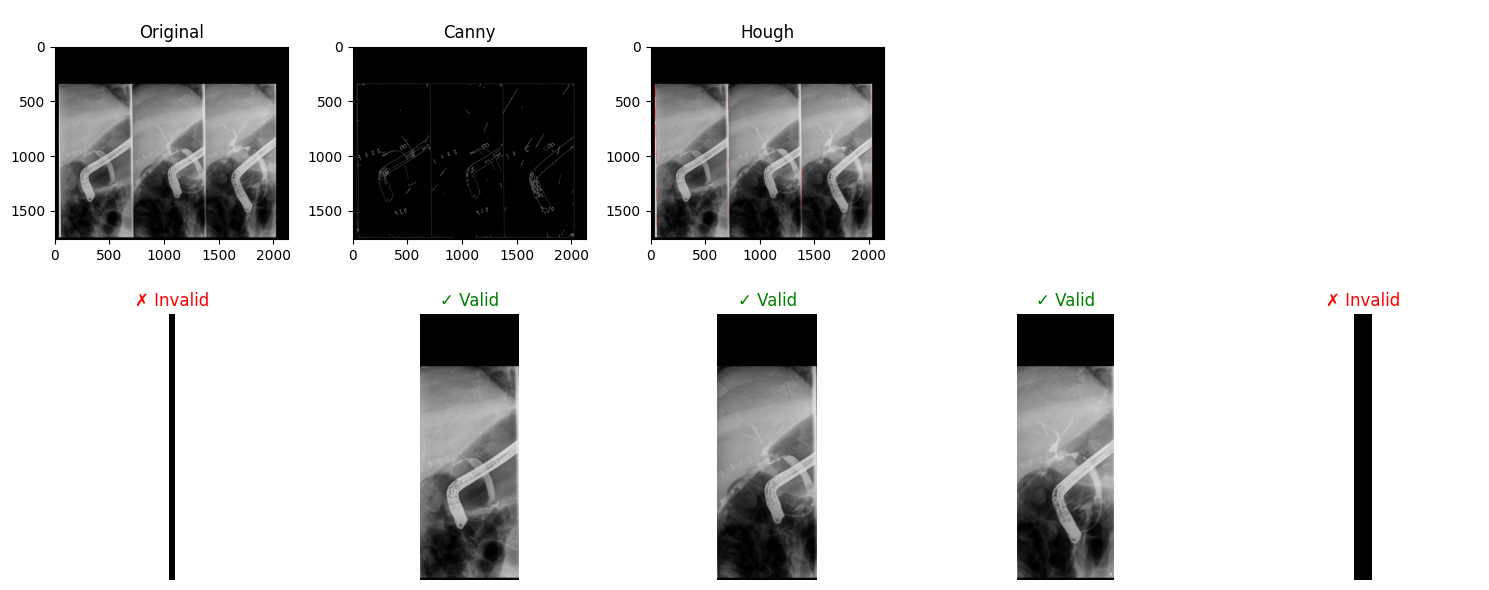

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19206.png


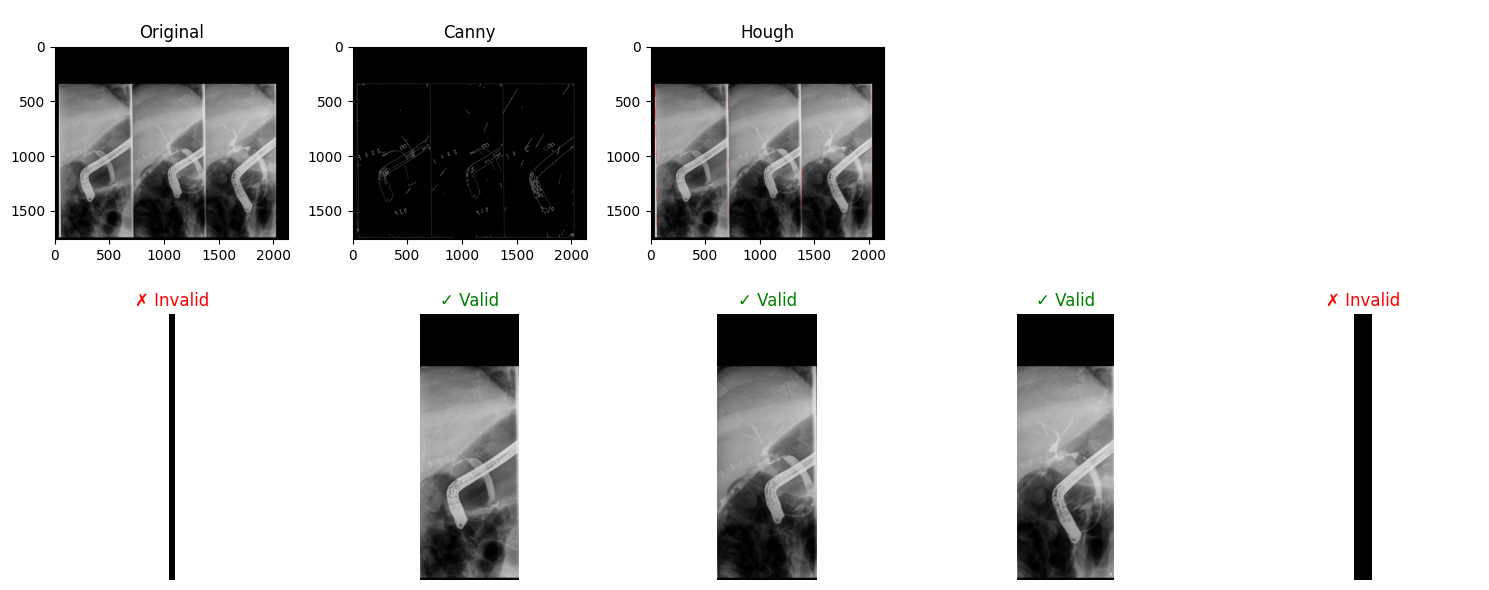

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19206.png


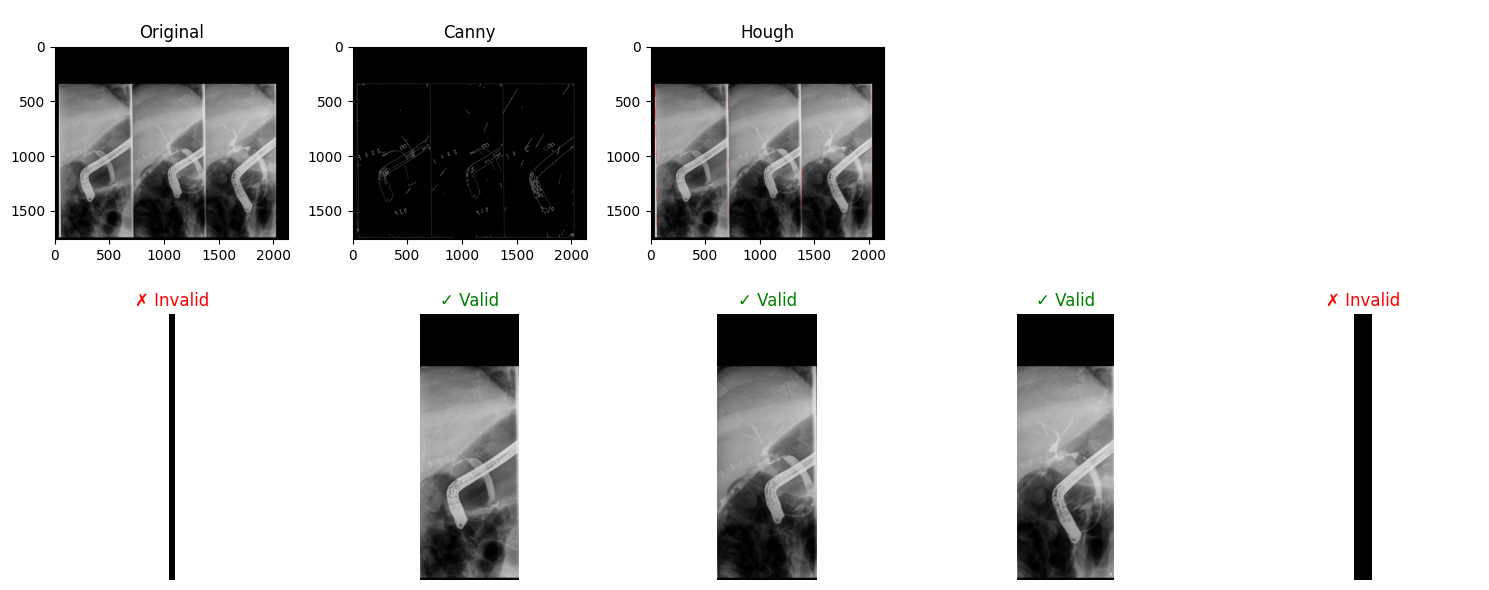

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19207.png


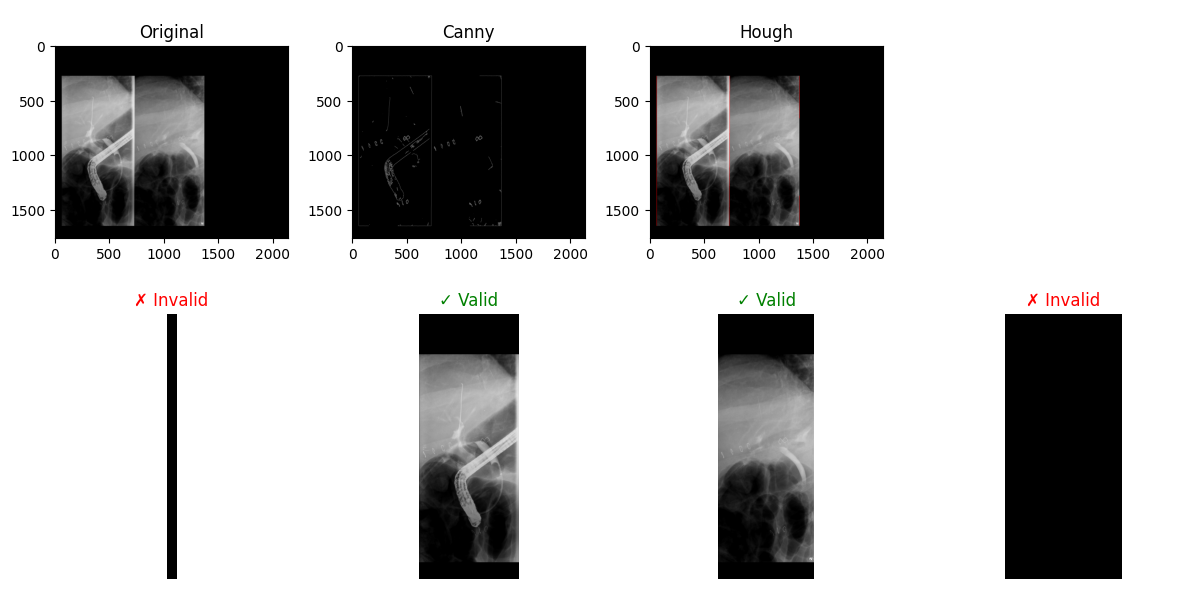

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19207.png


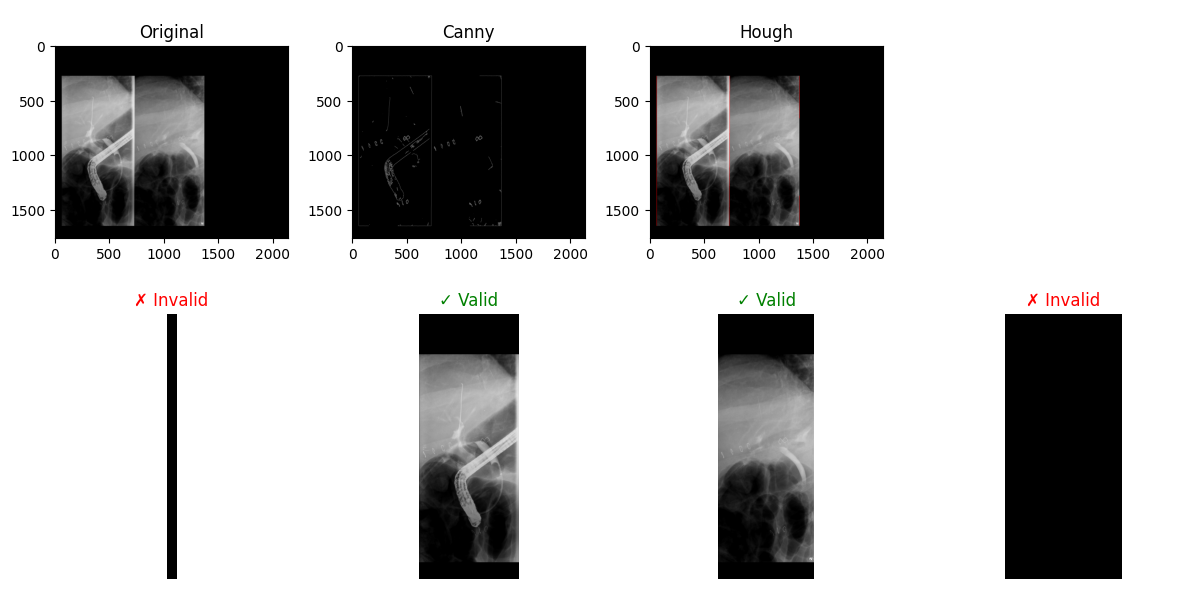

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19208.png


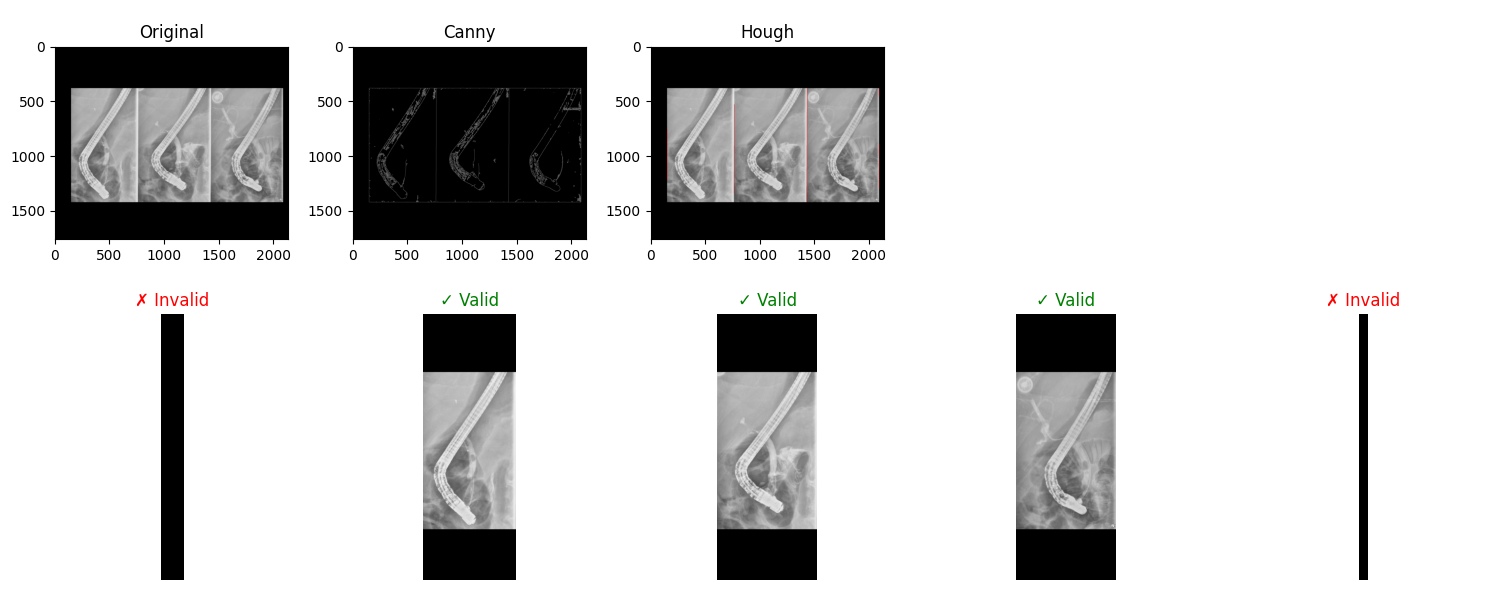

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19208.png


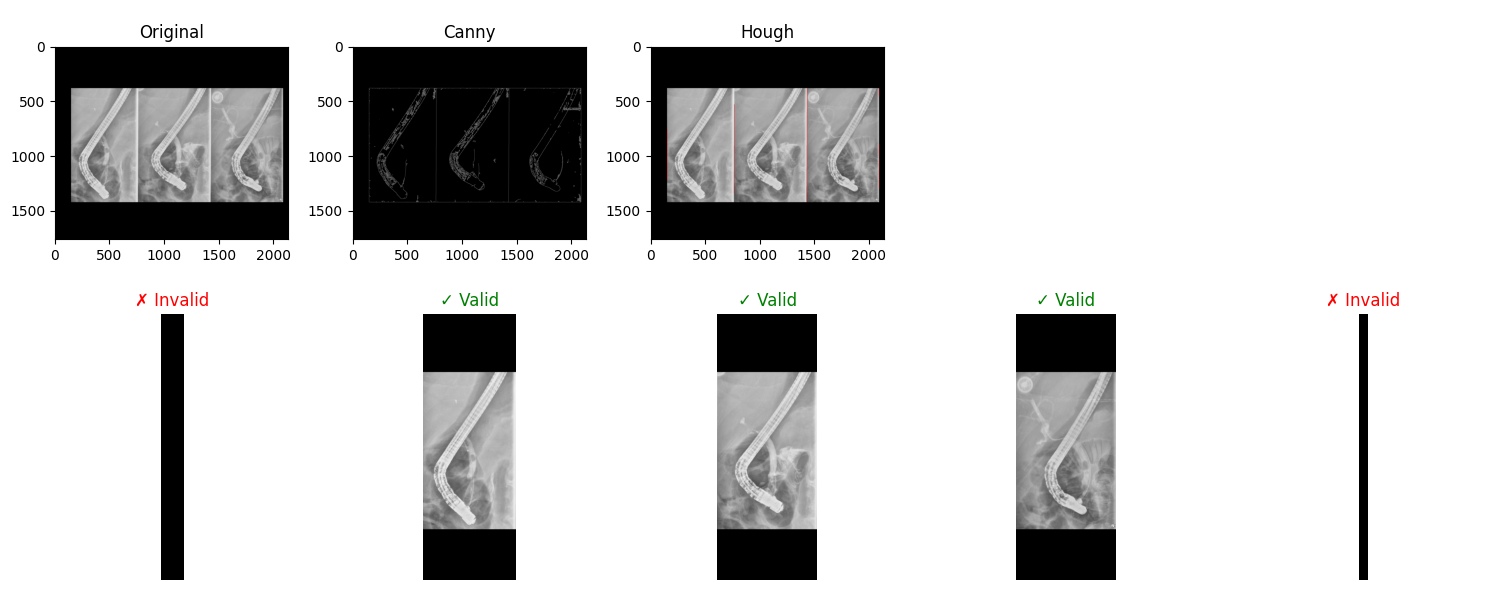

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19208.png


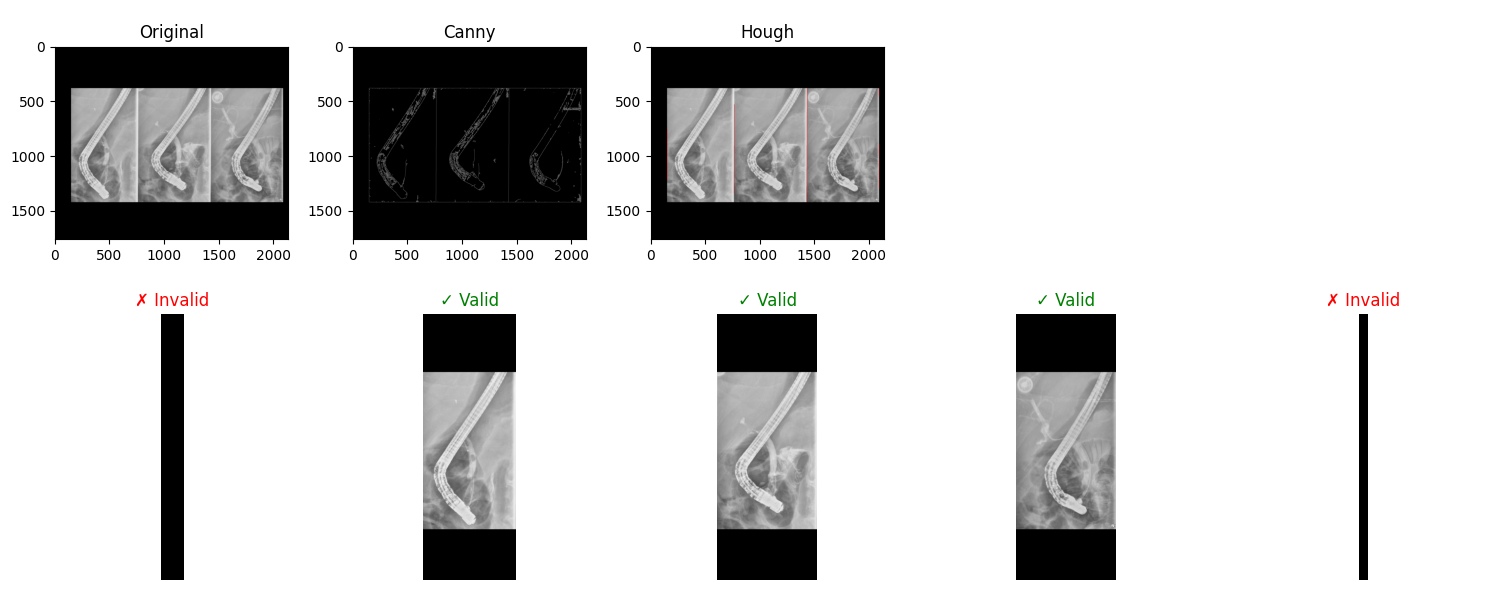

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19209.png


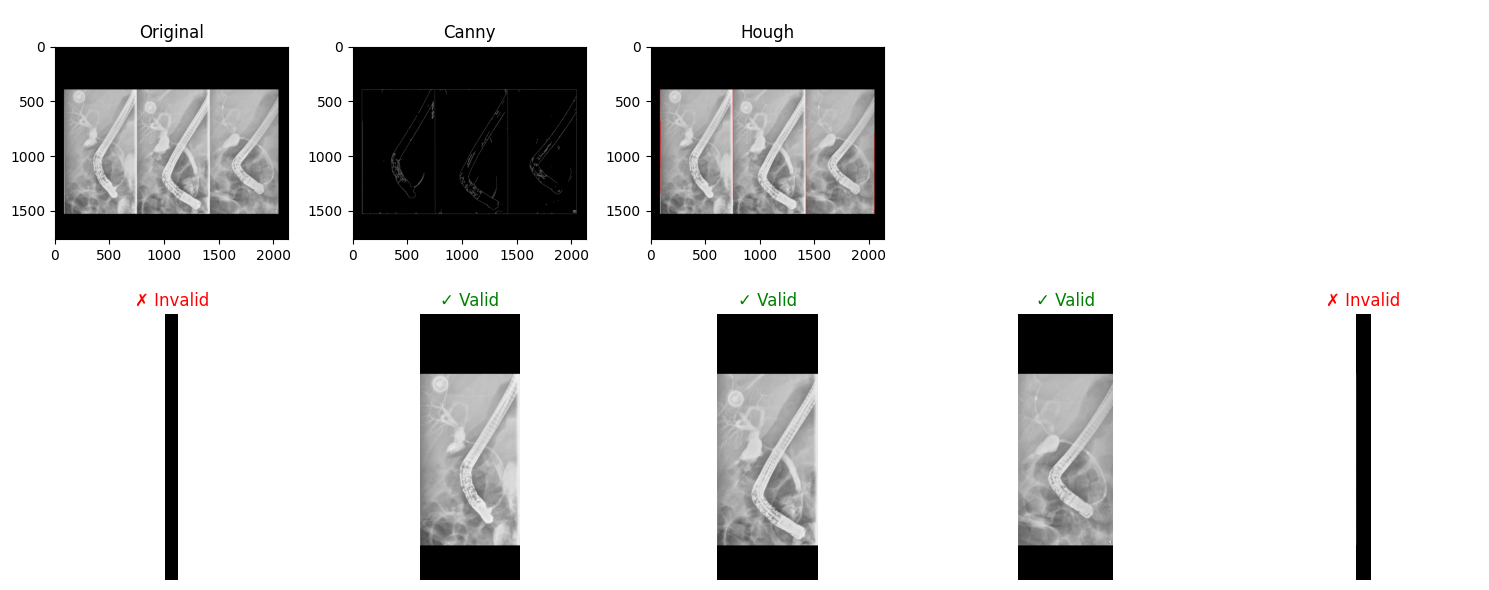

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19209.png


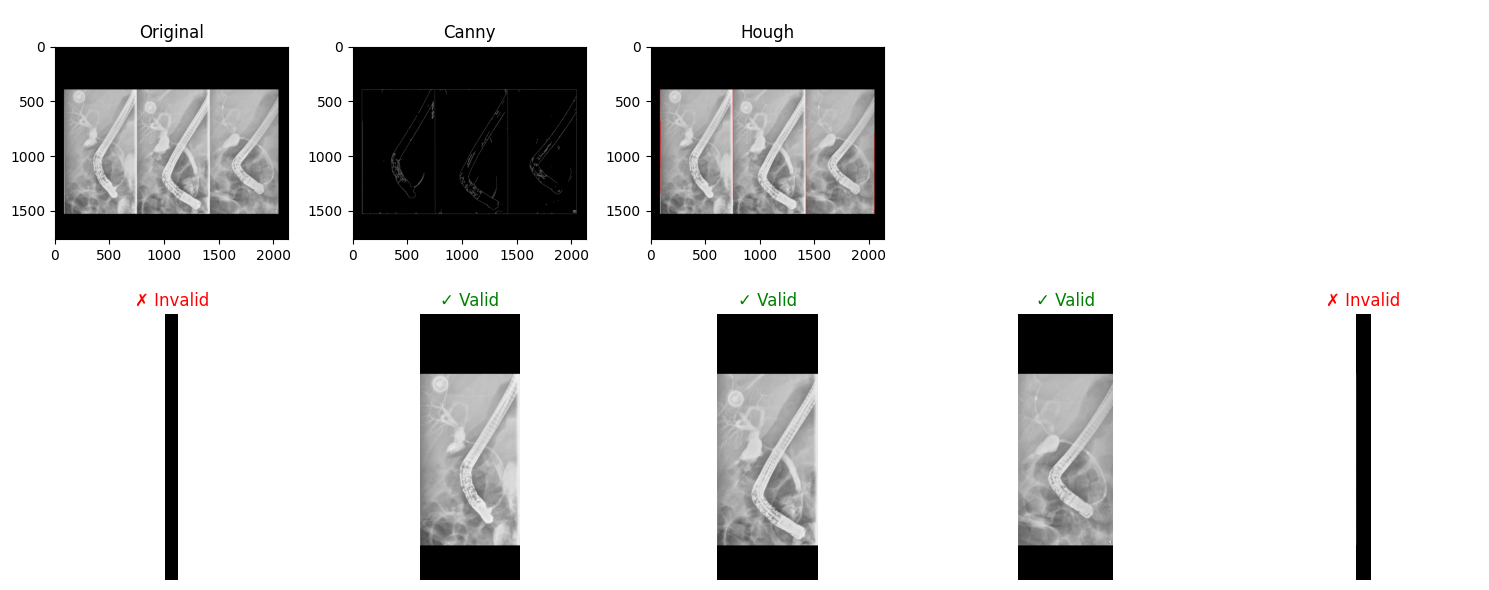

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19209.png


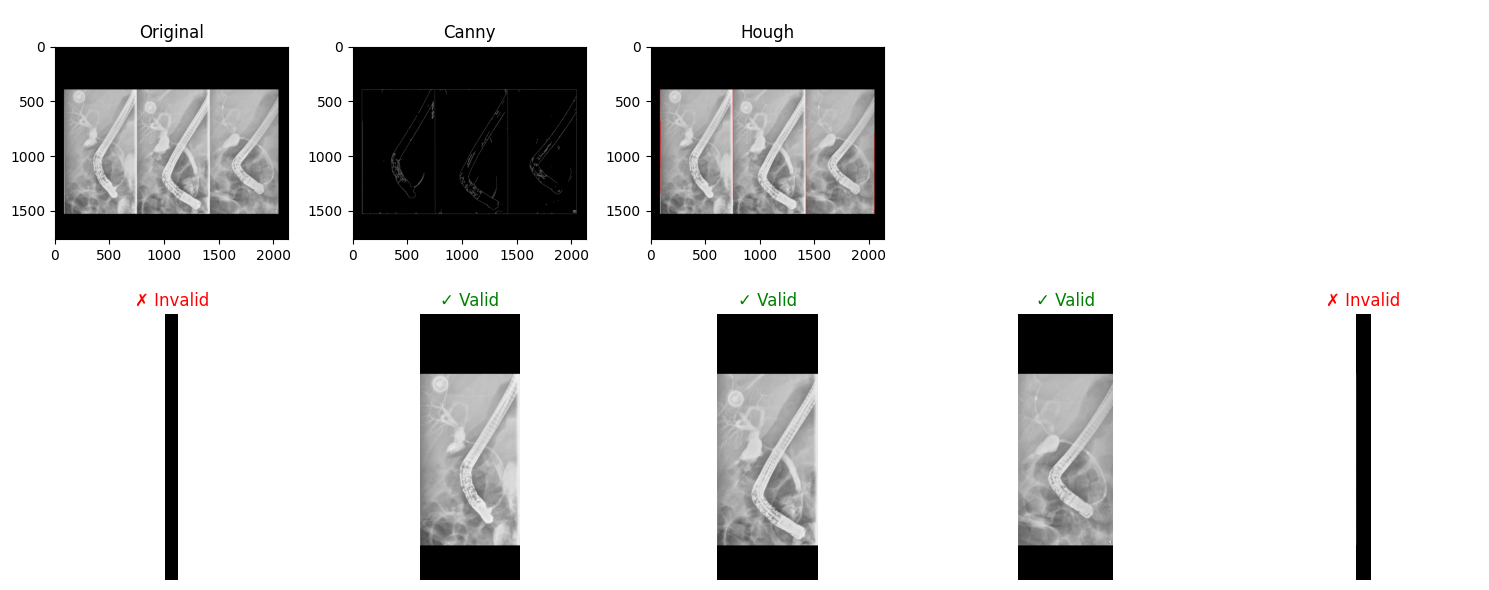

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19210.png


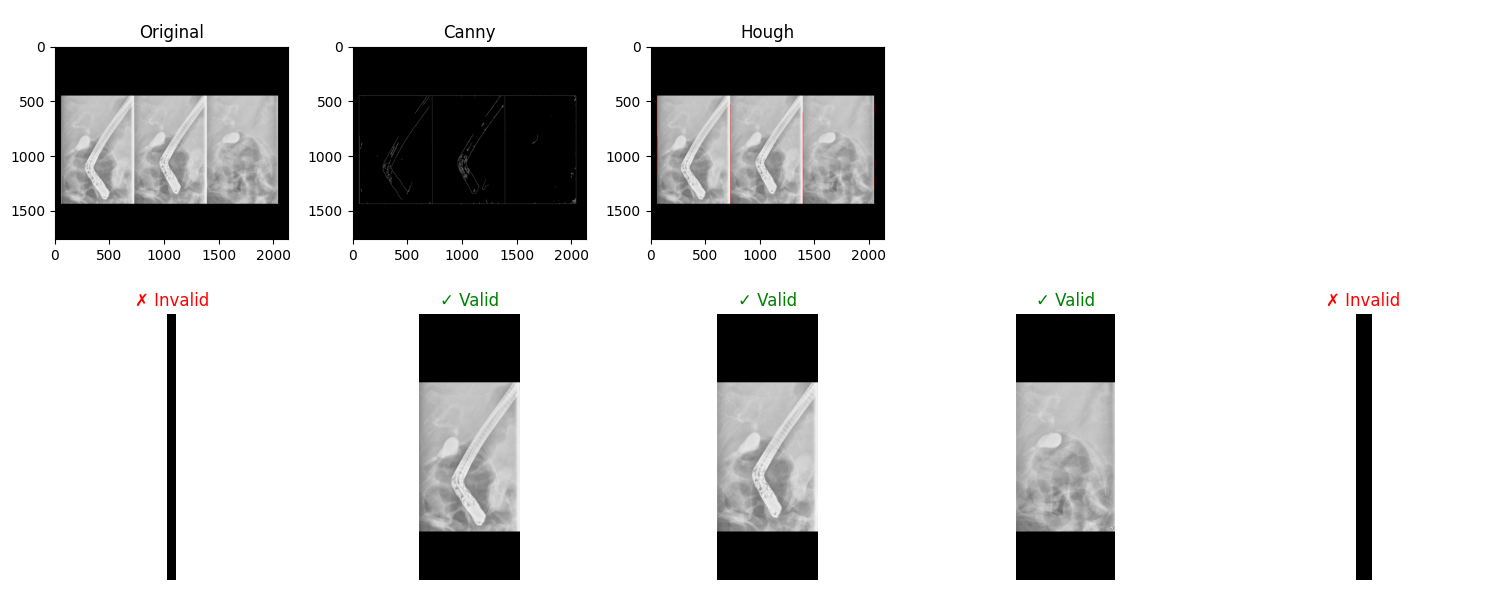

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19210.png


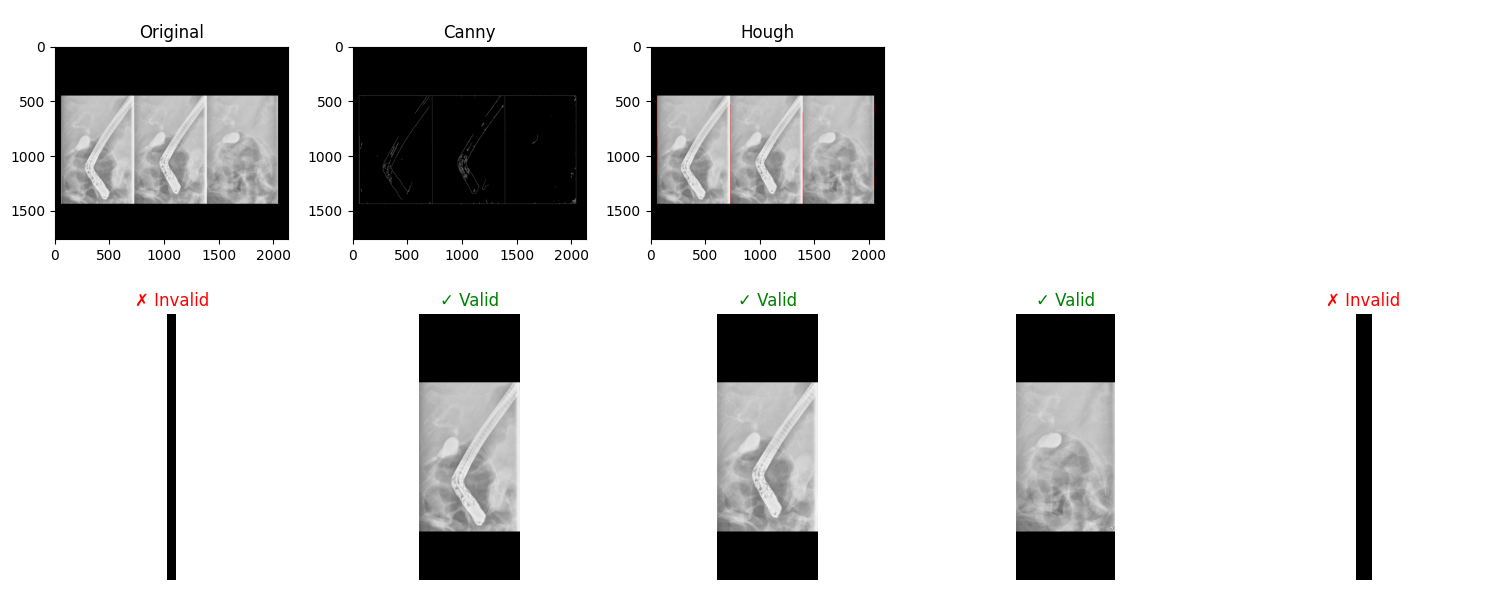

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1487_image19210.png


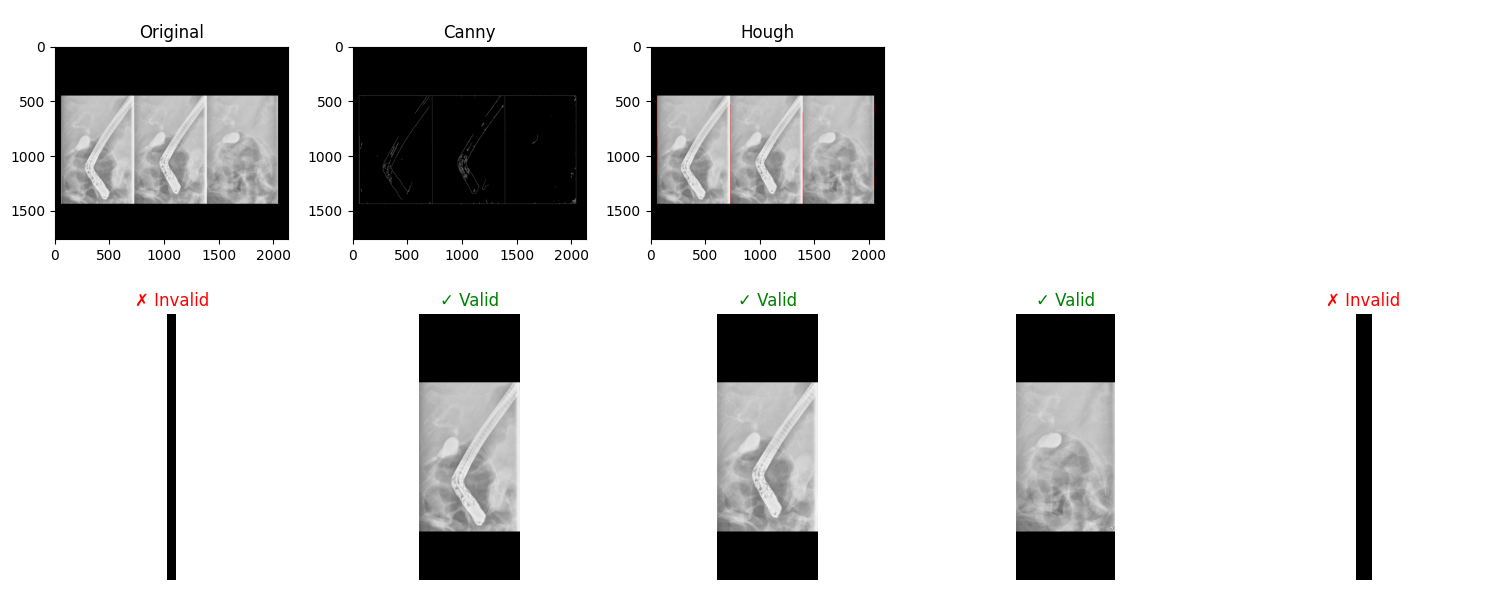

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1488_image19211.png


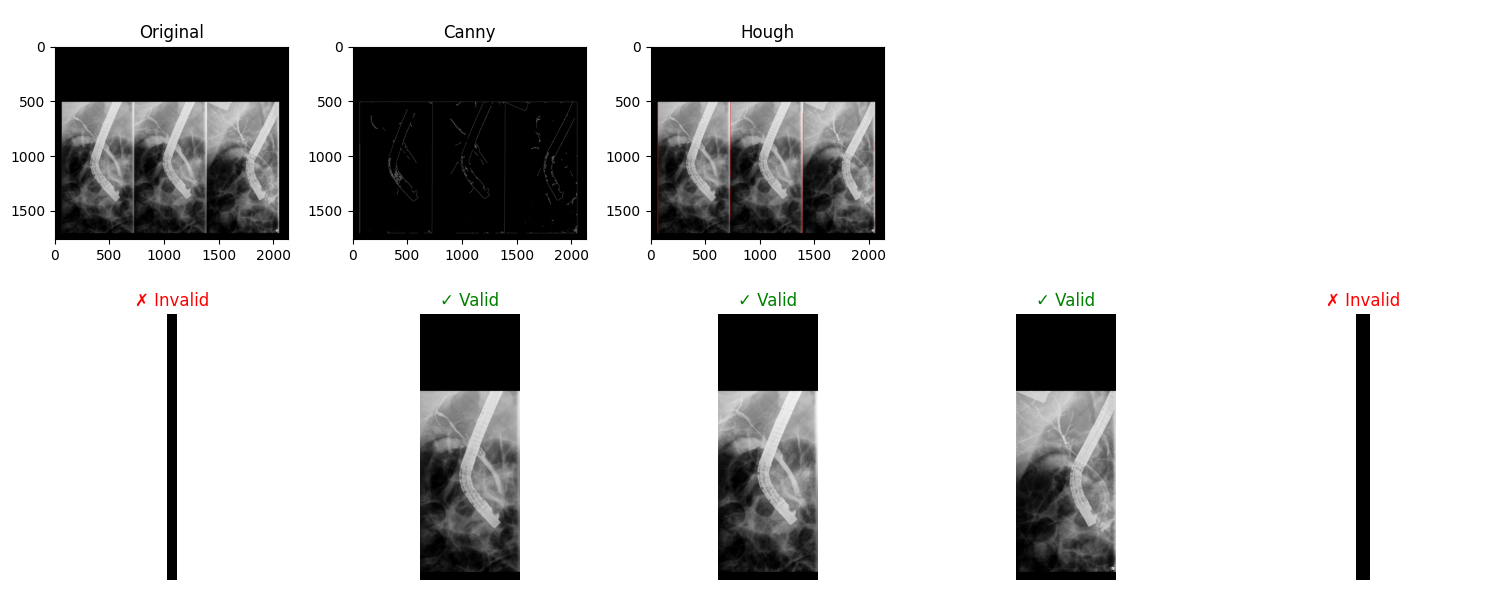

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1488_image19211.png


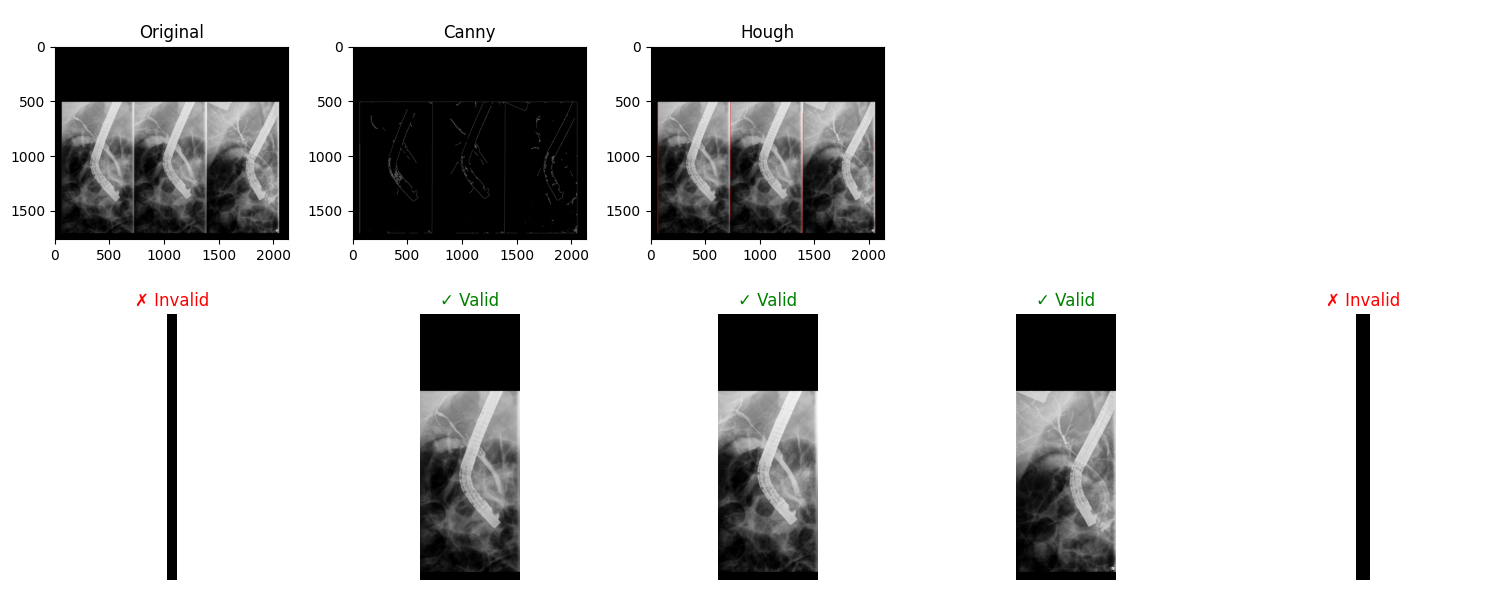

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1488_image19211.png


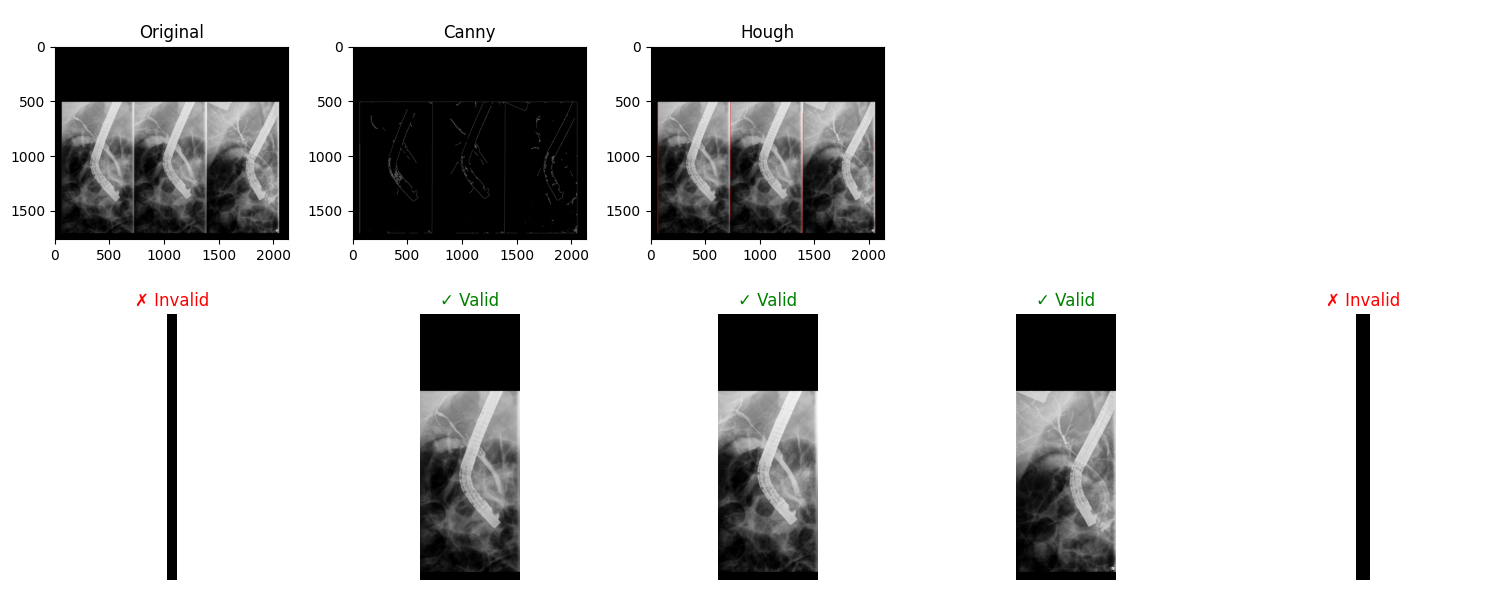

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1488_image19212.png


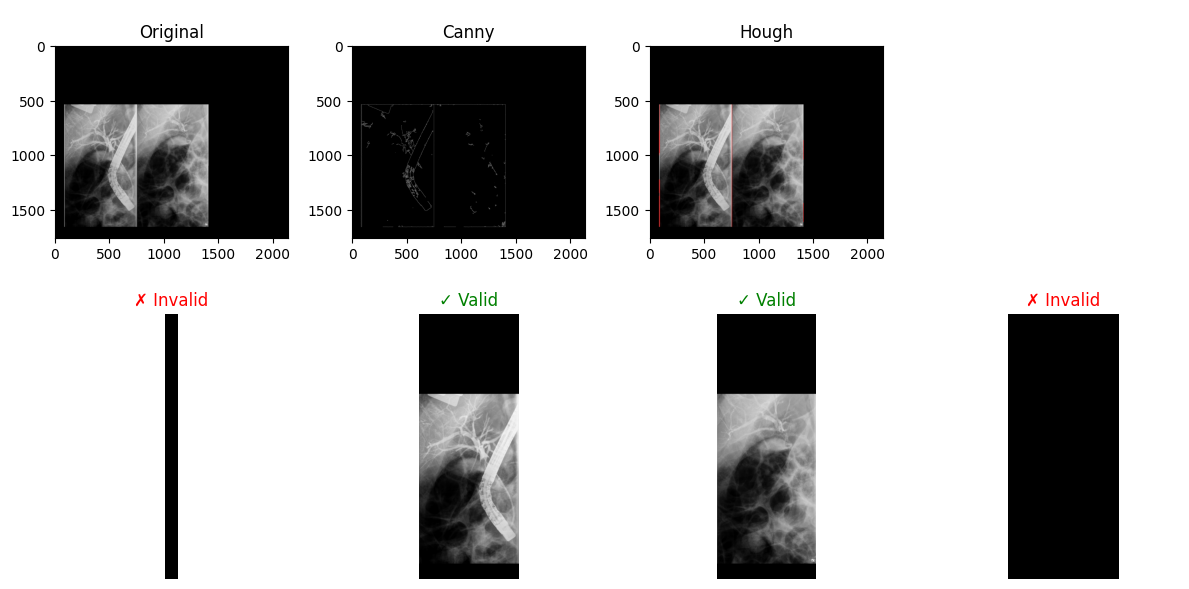

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1488_image19212.png


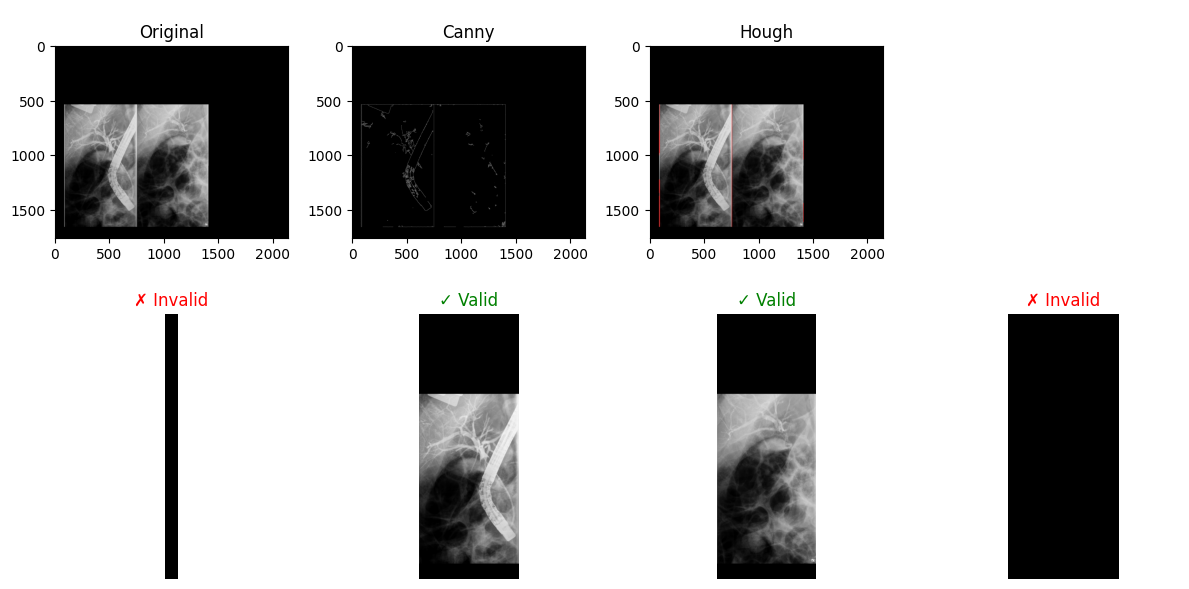

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1489_image19213.png


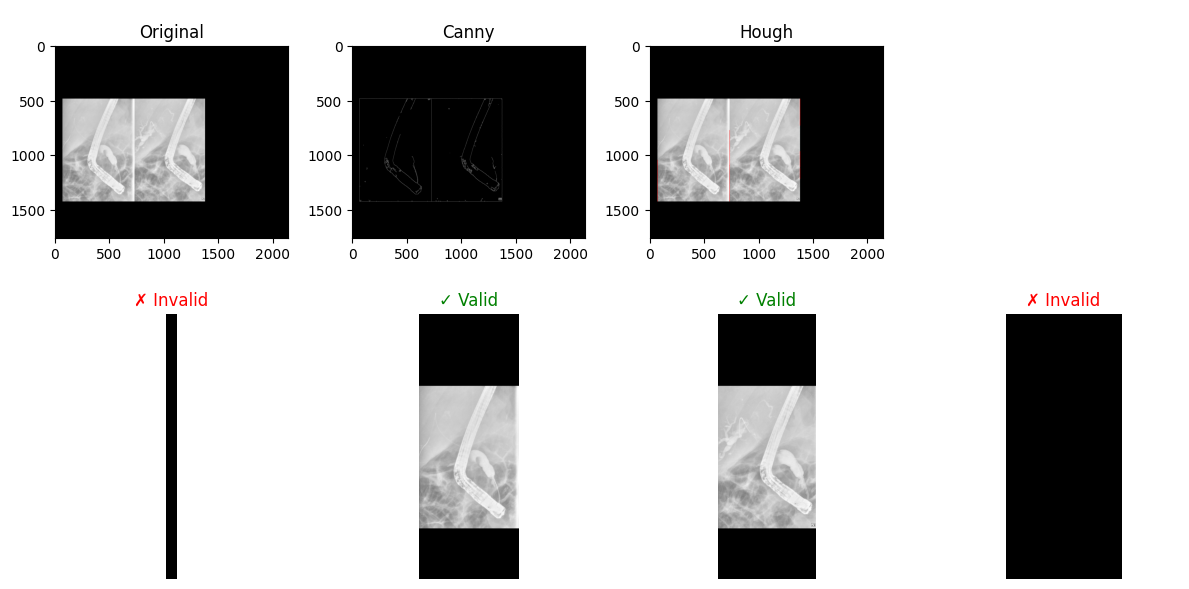

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1489_image19213.png


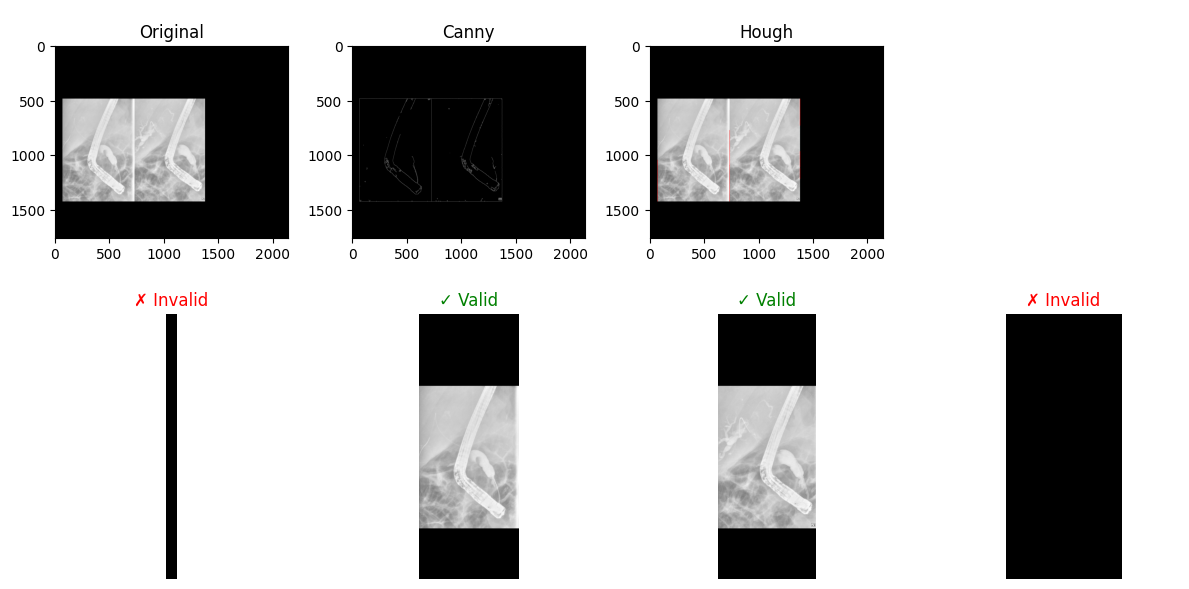

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1490_image19214.png


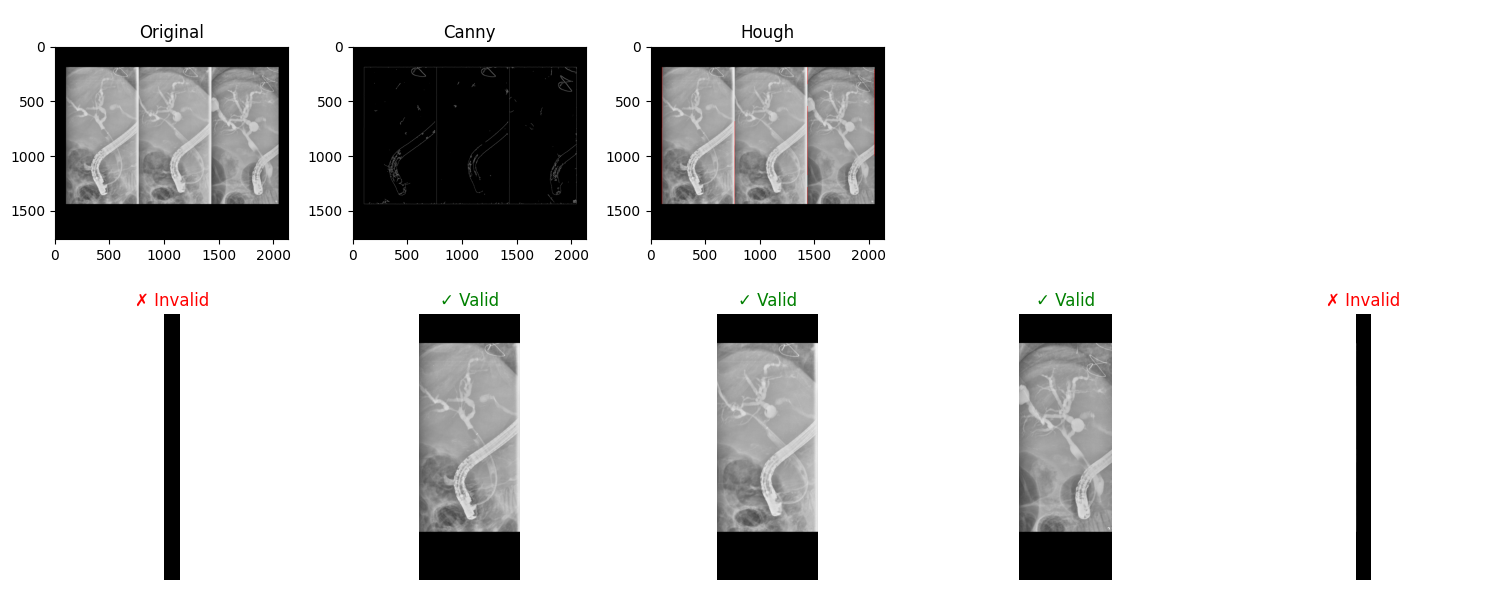

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1490_image19214.png


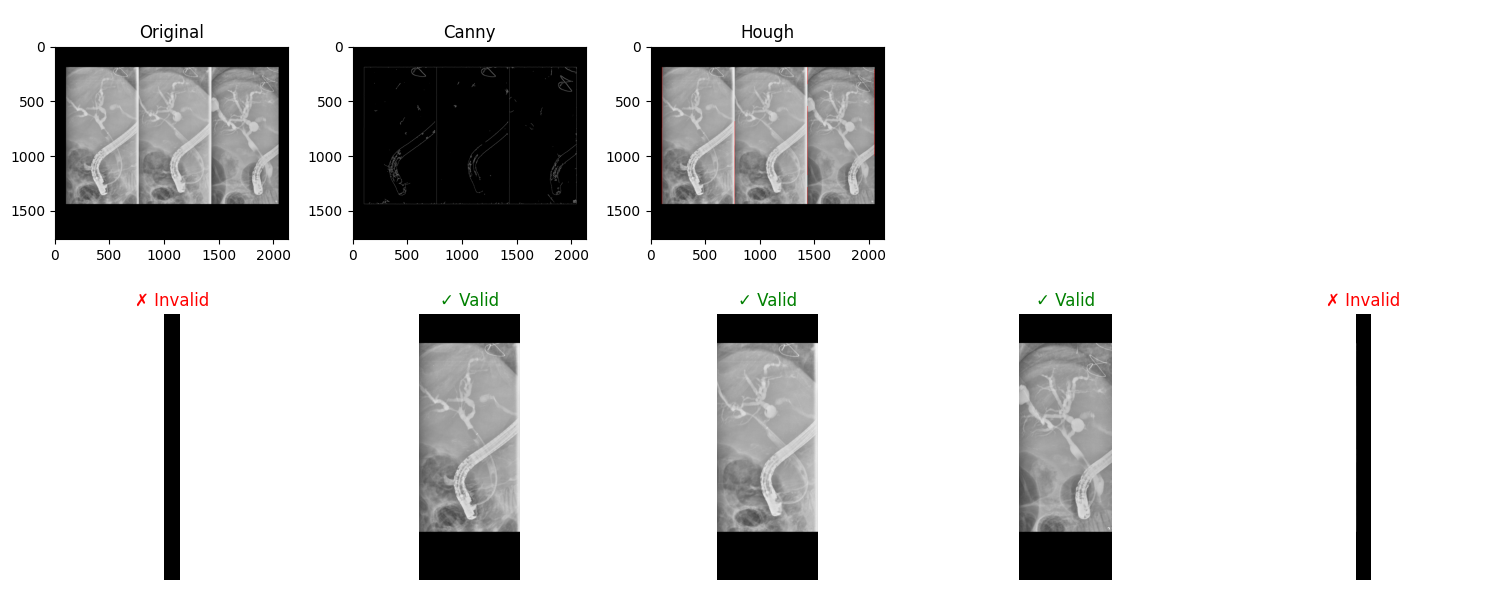

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1490_image19214.png


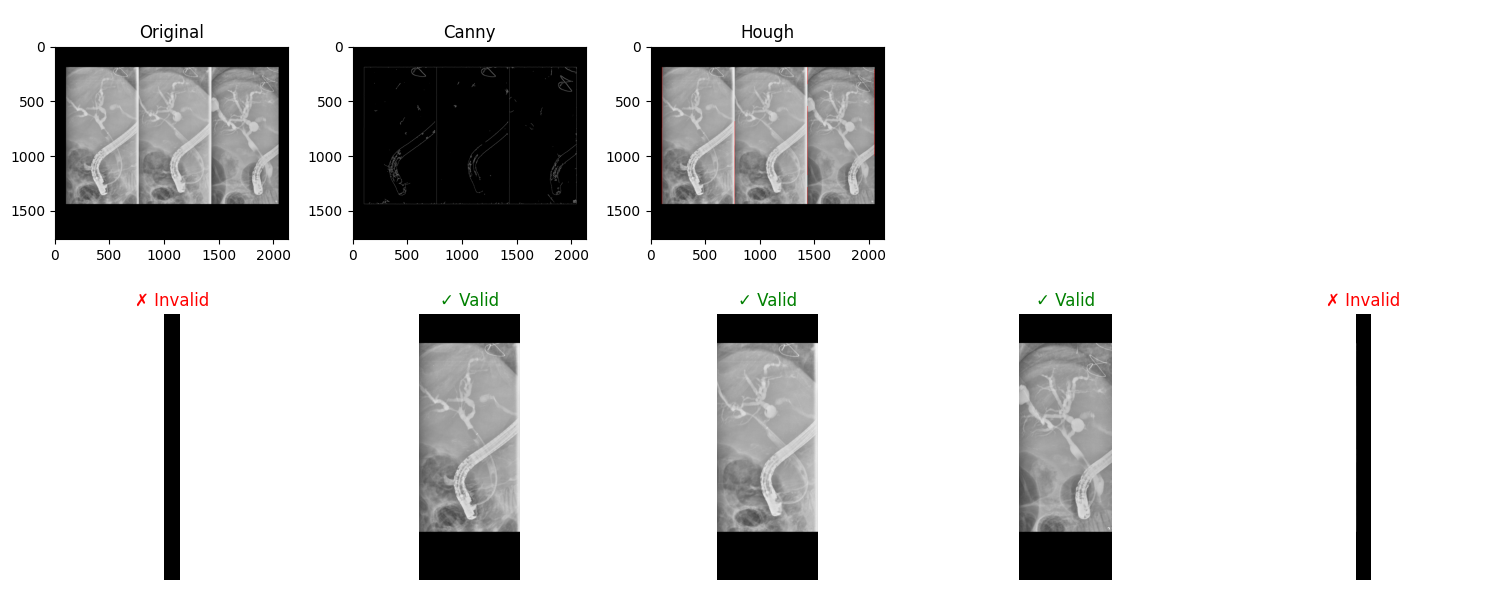

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1491_image19215.png


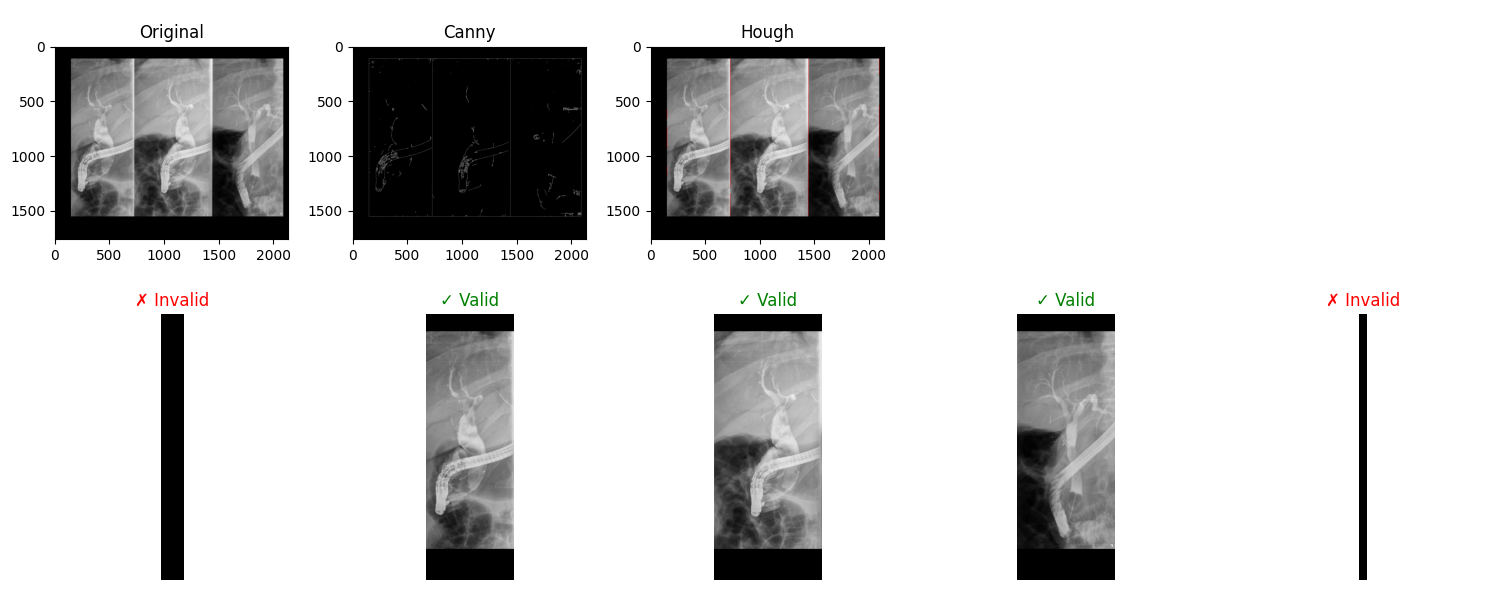

-------------------------------------------------------------------------------------------------------------------------------
Processing image raw/1491_image19215.png


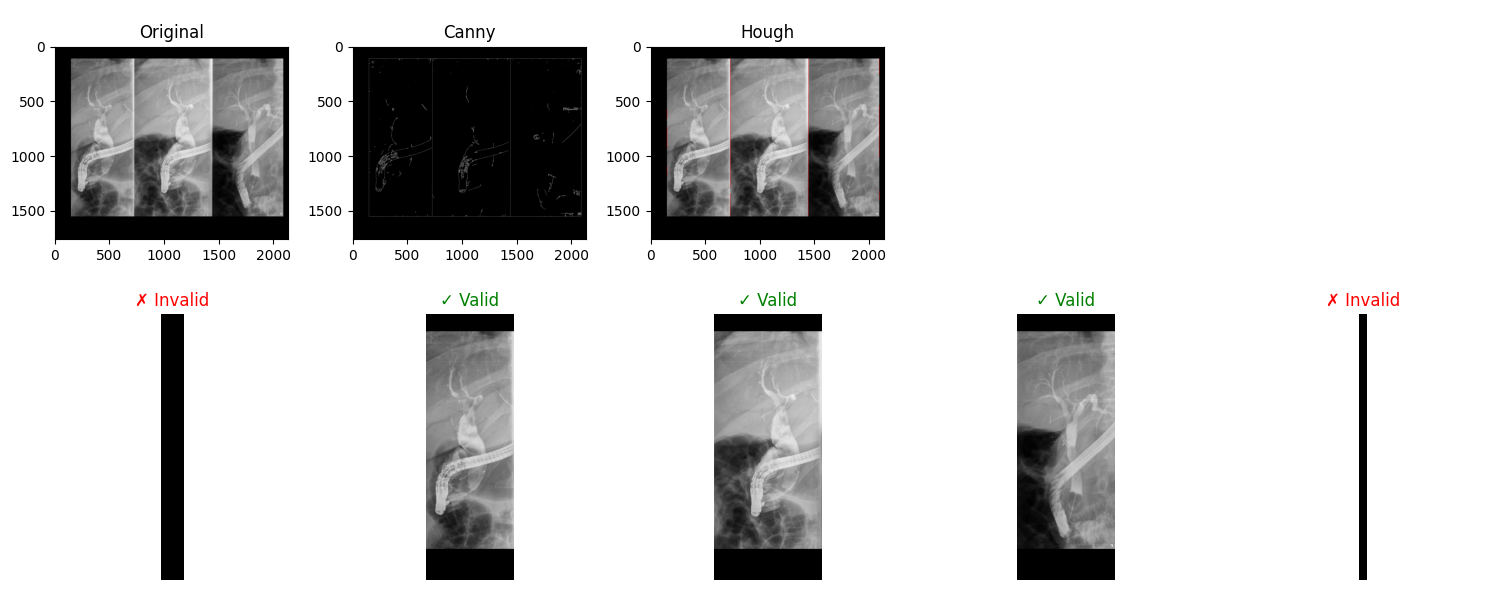

-------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# This cell runs the example and previously contained the full notebook code. Keeping this as the main execution cell preserves the current outputs.
import os

metadata_path = os.environ.get("METADATA_PATH", "metadata.csv")
print(f"Using metadata file: {metadata_path}")

# Plot 50 representative examples

df = pd.read_csv(metadata_path)
df_v = df[df["image_type"] == "V"].head(50)

for _, row in df_v.iterrows():
    print(f'Processing image {row["raw_image_path"]}')
    img = cv2.imread(row["raw_image_path"], cv2.IMREAD_GRAYSCALE)

    if img is None:
        print(f"❌ Error opening: {row['raw_image_path']}")
        continue

    edges, lines = detect_vertical_lines(img)
    segments = segment_image_by_vertical_lines(img, lines)
    
    plot_results(img, edges, lines, segments)
    print("-" * 119)